# Data Preparation

**Brazilian E-Commerce Public Dataset by Olist**

# **Business Problem Understanding**

**Context**

Olist operates an e-commerce marketplace where multiple sellers provide products customer across Brazil. The platform deals with diverse challenges, from demand forecasting and logistics optimization to customer satisfaction and retention. By leveraging data-driven insights, Olist can enhance customer experience, streamline operations, and maximize profitability.

**Target**

Our goal is to improve customer retention, optimize logistics, and boost revenue analyzing:
- *Customer Behavior & Segmentation:* Understanding Purchasing patterns and identifying high-value customers (RFM Analysis)
- *Sales Trends & Seasonality:* Detecting demand fluctuations to optimize inventory and promotions
- *Order Fulfillment & Delivery Performance:* Reducing delays and improving logistics efficiency
- *Payment Behavior & Revenue Impact:* Evaluating installment trends and their effect on revenue
- *Customer Feedback & Sentiment Analysis:* Extracting insights from reviews to enhance satisfaction

**Problem Statement**

*How can we enhance customer experience, optimize operations, and increase profitability in the e-commerce marketplace using data-driven insights and machine learning models?*

**Goals**

*Business Goals*
- Identify high-value customers and their purchasing patterns using RFM analysis
- Optimize delivery logistics by analyzing order fulfillment and delays
- Enhance pricing & promotions based on sales trends and demand forecasting
- Predict customer churn and take proactive measures to retain users

*Analytical Goals*
- Perform RFM segmentation to group customers based on purchasing behavior
- Analyze sales trends & seasonality for better demand forecasting
- Detect outliers in order fulfillment (e.g.,  delivery delays)
- Use Natural Language Processing (NLP) to analyze customer reviews
- Evaluate payment behavior to assess installment usage and impact on revenue
- Develop a churn prediction model based on customer order history

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
from folium.plugins import HeatMap

# Upload Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "../dataset/"
# data_path = "/content/drive/MyDrive/Final_Projek_Olist_Dataset/dataset/" #drive

orders = pd.read_csv(data_path + "olist_orders_dataset.csv")
payments = pd.read_csv(data_path + "olist_order_payments_dataset.csv")
customers = pd.read_csv(data_path + "olist_customers_dataset.csv")
orderItems = pd.read_csv(data_path + "olist_order_items_dataset.csv")
products = pd.read_csv(data_path + "olist_products_dataset.csv")
sellers = pd.read_csv(data_path + "olist_sellers_dataset.csv")
geolocation = pd.read_csv(data_path + "olist_geolocation_dataset.csv")
orderReviews = pd.read_csv(data_path + "olist_order_reviews_dataset.csv")
productCategoryTranslation = pd.read_csv(data_path + "product_category_name_translation.csv")

#for geolocation analysis
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
brazil= world[world['ADMIN'] == 'Brazil']
olist_analysis = pd.read_csv(data_path + 'finalOutlierTreated.csv')

# Exploratory Data Analysis

## Orders - EDA

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [ ]:
orders['purchased_approved'] = (orders.order_approved_at -orders.order_purchase_timestamp).dt.seconds
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18               642.0               2.0   
1                    2018-08-13             24170.0               0.0   
2                    2018-09-04               994.0               0.0   
3                    2017-12-15              1073.0               3.0   
4                    2018-02-26              3710.0               0.0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                6.0                  7.0                  8.0  
1               12.0                  5.0                 13.0  
2                9.0                 17.0                  9.0  
3                9.0                 12.0                 13.0  
4                1.0                  9.0                  2.0

Observations:

- New columns are created using the available datetime columns for easy analysis of the available data.
- Purchased_approved represents the seconds taken for an order to get approved after the customer purchases it.
- approved_carrier represents the days taken for the order to go to the delivery carrier after it being approved.
- carrier_delivered represents the days taken for the order to be delivered to the customer from the date it reaches the delivery carrier.
- delivered_estimated represents the date difference between the estimated delivery date and the actual delivery date.
- purchased_delivered represents the days taken for the order to be delivered to the customer from the date the customer made the purchase.

In [ ]:
orders.describe(include = np.number)

purchased_approved  approved_carrier  carrier_delivered  \
count        99281.000000      97644.000000       96475.000000   
mean         14198.031496          2.301749           8.878310   
std          23663.448160          3.560283           8.746088   
min              0.000000       -172.000000         -17.000000   
25%            755.000000          0.000000           4.000000   
50%           1169.000000          1.000000           7.000000   
75%          17166.000000          3.000000          12.000000   
max          86399.000000        125.000000         205.000000   

       delivered_estimated  purchased_delivered  
count         96476.000000         96476.000000  
mean             10.876881            12.094086  
std              10.183854             9.551746  
min            -189.000000             0.000000  
25%               6.000000             6.000000  
50%              11.000000            10.000000  
75%              16.000000            15.000000  
max             146.000000           209.000000

In [ ]:
falsifiedData = orders[orders.approved_carrier < 0].index
orders.drop(index = falsifiedData, inplace = True)

In [ ]:
falsifiedData = orders[orders.carrier_delivered < 0].index
orders.drop(index = falsifiedData, inplace = True)

In [ ]:
canceledIndex = orders.dropna()[orders.order_status == 'canceled'].index
orders.drop(index = canceledIndex, inplace = True)

<ipython-input-263-fdd88e6dfcb5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  canceledIndex = orders.dropna()[orders.order_status == 'canceled'].index


Observations:

Orders which have carrier date prior to the date of order getting approved, and orders which have delivered date prior to the carrier date are considered to be falsified data, as it could not be logically true.
Such records are dropped.
Also the records which are cancelled and have no null values are also dropped as we consider only the records which have a order status of delivered.

In [ ]:
orders.describe(include = np.number)

purchased_approved  approved_carrier  carrier_delivered  \
count        97893.000000      96256.000000       95096.000000   
mean         13950.420428          2.357224           8.910228   
std          23484.689925          3.503335           8.755221   
min              0.000000          0.000000           0.000000   
25%            752.000000          0.000000           4.000000   
50%           1153.000000          1.000000           7.000000   
75%          15785.000000          3.000000          12.000000   
max          86399.000000        125.000000         205.000000   

       delivered_estimated  purchased_delivered  
count         95097.000000         95097.000000  
mean             10.825568            12.153359  
std              10.199320             9.577379  
min            -189.000000             0.000000  
25%               6.000000             6.000000  
50%              11.000000            10.000000  
75%              16.000000            15.000000  
max             146.000000           209.000000

In [ ]:
otherThanDelivered = orders[(orders.isna().any(axis = 1)) & (orders.order_status != 'delivered')].index
orders.drop(index = otherThanDelivered, inplace = True)

In [ ]:
approvedAtNull = orders[orders.order_approved_at.isna()].index
orders.loc[approvedAtNull, 'order_approved_at'] = orders.loc[approvedAtNull, 'order_purchase_timestamp'] + pd.Timedelta(seconds = orders.purchased_approved.median())

In [ ]:
deliveredCarrierNull = orders[orders.order_delivered_carrier_date.isna()].index
orders.loc[deliveredCarrierNull, 'order_delivered_carrier_date'] = orders.loc[deliveredCarrierNull, 'order_approved_at'] + pd.Timedelta(days = orders.approved_carrier.median())

In [ ]:
deliveredCustomerNull = orders[orders.order_delivered_customer_date.isna()].index
orders.loc[deliveredCustomerNull, 'order_delivered_customer_date'] = orders.loc[deliveredCustomerNull, 'order_delivered_carrier_date'] + pd.Timedelta(days = orders.carrier_delivered.median())

Observations:

- The null values are dropped which do not have the order status as delivered.
- The null values in the order_approved_at field is imputed by adding the median number of seconds it took for an order to get approved after it is purchased, with the order_purchase_timestamp.
- The null values in the order_delivered_carrier_date field is imputed by adding the median number of days it took for an order to reach the carrier after it is approved, with the order_approved_at timestamp.
- The null values in the order_delivered_customer_date field is imputed by adding the median number of days it took for an order to get delivered to the customer after it reaches the carrier, with the order_delivered_carrier_date timestamp.

In [ ]:
orders['purchased_approved'] = (orders.order_approved_at -orders.order_purchase_timestamp).dt.seconds
orders['approved_carrier'] = (orders.order_delivered_carrier_date - orders.order_approved_at).dt.days
orders['carrier_delivered'] = (orders.order_delivered_customer_date - orders.order_delivered_carrier_date).dt.days
orders['delivered_estimated'] = (orders.order_estimated_delivery_date - orders.order_delivered_customer_date).dt.days
orders['purchased_delivered'] = (orders.order_delivered_customer_date - orders.order_purchase_timestamp).dt.days
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                  6                    7                    8  
1                 12                    5                   13  
2                  9                   17                    9  
3                  9                   12                   13  
4                  1                    9                    2

In [ ]:
orders.describe(exclude = np.number)

order_id                       customer_id  \
count                              95105                             95105   
unique                             95105                             95105   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status       order_purchase_timestamp  \
count         95105                          95105   
unique            1                            NaN   
top       delivered                            NaN   
freq          95105                            NaN   
mean            NaN  2017-12-31 02:34:27.376015616   
min             NaN            2016-09-15 12:16:38   
25%             NaN            2017-09-12 21:39:28   
50%             NaN            2018-01-18 01:16:32   
75%             NaN            2018-05-03 18:54:48   
max             NaN            2018-08-29 15:00:37   

                    order_approved_at   order_delivered_carrier_date  \
count                           95105                          95105   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2017-12-31 12:13:21.013206784  2018-01-03 08:40:14.688617984   
min               2016-09-15 12:16:38            2016-10-08 10:34:01   
25%               2017-09-13 10:15:16            2017-09-15 15:17:29   
50%               2018-01-18 11:55:13            2018-01-22 21:28:40   
75%               2018-05-04 03:31:43            2018-05-07 14:19:00   
max               2018-08-29 15:10:26            2018-09-11 19:48:28   

        order_delivered_customer_date  order_estimated_delivery_date  
count                           95105                          95105  
unique                            NaN                            NaN  
top                               NaN                            NaN  
freq                              NaN                            NaN  
mean    2018-01-12 17:24:44.920782336  2018-01-23 20:29:15.920298496  
min               2016-10-11 13:46:32            2016-10-04 00:00:00  
25%               2017-09-23 15:28:07            2017-10-04 00:00:00  
50%               2018-01-31 19:16:10            2018-02-14 00:00:00  
75%               2018-05-14 19:48:48            2018-05-25 00:00:00  
max               2018-10-17 13:22:46            2018-10-25 00:00:00

Observations:

- From the summary statistics, we could infer that the it took an average(median is considered as it is highly right skewed) of 1153 seconds or over half an hour hours for the order to get approved after the customer purchased it.
- It took on an average of 12 days for the order to get delivered to the customer from the date of purchase.
- Since we considered orders which are only delivered, the order_status feature has only one class, i.e., delivered.
- The first order was placed on 15/09/2016 and the last order was placed on 29/08/2018, from the available dataset.
- On an average it took 11 days for an order to get delivered to the customer before the estimated date of delivery. There are many orders which were delivered late than the estimated date of delivery.

Distribution of purchased approved

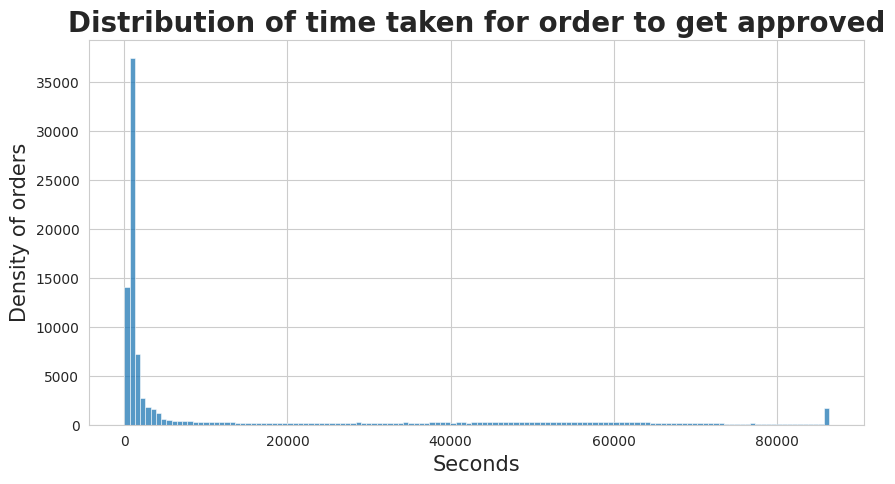

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_approved', data=orders)
plt.title('Distribution of time taken for order to get approved',fontweight='bold',fontsize=20)
plt.xlabel('Seconds',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.show()

In [ ]:
Q1 = np.quantile(orders.purchased_approved, 0.25)
Q3 = np.quantile(orders.purchased_approved, 0.75)
IQR = Q3 - Q1
purchasedApprovedDist = orders[~((orders.purchased_approved < Q1 - 1.5 * IQR) | (orders.purchased_approved > Q3 + 1.5 * IQR))]
purchasedApprovedDist.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                  6                    7                    8  
1                 12                    5                   13  
2                  9                   17                    9  
3                  9                   12                   13  
4                  1                    9                    2

<ipython-input-273-16cbb1588d06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(purchasedApprovedDist.purchased_approved)


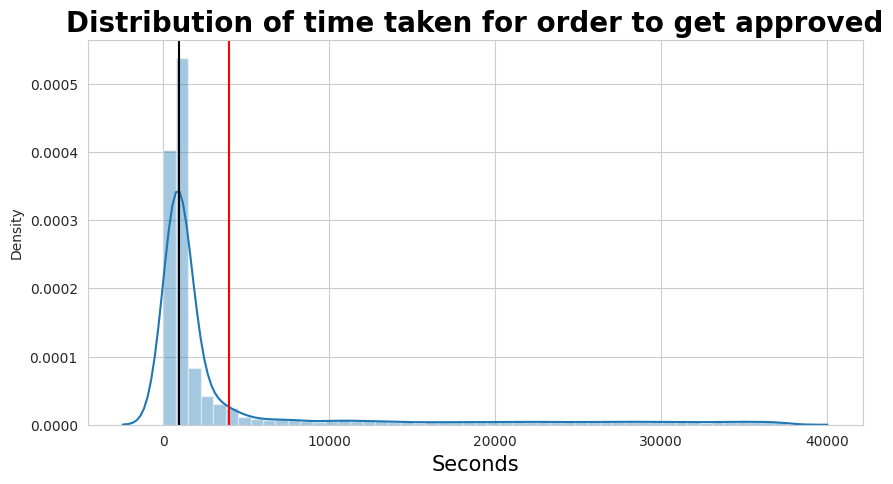

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(purchasedApprovedDist.purchased_approved)
plt.axvline(purchasedApprovedDist.purchased_approved.mean(), c = 'red')
plt.axvline(purchasedApprovedDist.purchased_approved.median(), c = 'black')
plt.xlabel('Seconds',color='black',fontsize=15)
plt.title('Distribution of time taken for order to get approved',color='black',fontsize=20,fontweight='bold')
plt.show()

In [ ]:
purchasedApprovedDist.purchased_approved.describe()

count    78335.000000
mean      3944.854867
std       7741.478369
min          0.000000
25%        707.000000
50%        955.000000
75%       1940.000000
max      37563.000000
Name: purchased_approved, dtype: float64

Observations:

The approval time of orders within the interquartile range are spread mostly between 0 and 5000 seconds, which could be seen in the distribution plot.
The average time taken for approval of the orders is 3844.85 seconds.

Distribution of purchased_delivered

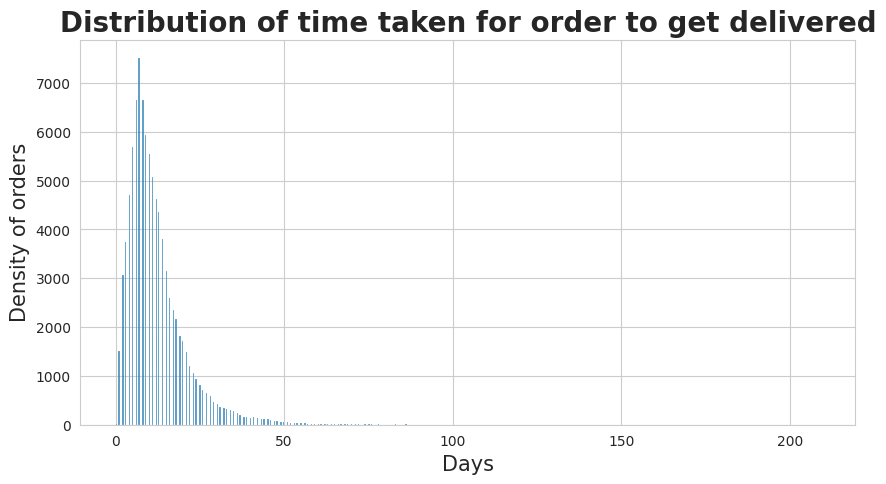

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='purchased_delivered', data=orders)
plt.title('Distribution of time taken for order to get delivered',fontweight='bold',fontsize=20)
plt.xlabel('Days',fontsize=15)
plt.ylabel('Density of orders',fontsize=15)
plt.show()


In [ ]:
Q1 = np.quantile(orders.purchased_delivered, 0.25)
Q3 = np.quantile(orders.purchased_delivered, 0.75)
IQR = Q3 - Q1
purchasedDeliveredDist = orders[~((orders.purchased_delivered < Q1 - 1.5 * IQR) | (orders.purchased_delivered > Q3 + 1.5 * IQR))]
purchasedDeliveredDist.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  \
0                    2017-10-18                 642                 2   
1                    2018-08-13               24170                 0   
2                    2018-09-04                 994                 0   
3                    2017-12-15                1073                 3   
4                    2018-02-26                3710                 0   

   carrier_delivered  delivered_estimated  purchased_delivered  
0                  6                    7                    8  
1                 12                    5                   13  
2                  9                   17                    9  
3                  9                   12                   13  
4                  1                    9                    2

<ipython-input-277-35fcdededc0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(purchasedDeliveredDist.purchased_delivered)


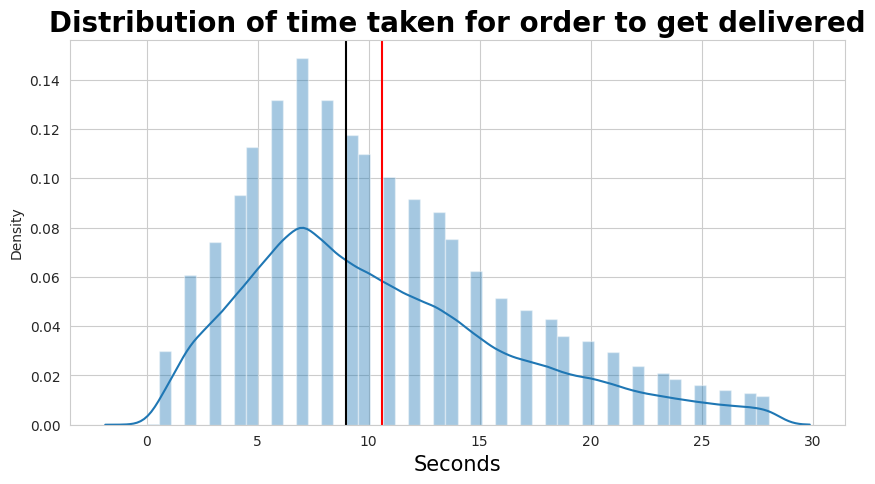

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(purchasedDeliveredDist.purchased_delivered)
plt.axvline(purchasedDeliveredDist.purchased_delivered.mean(), c = 'red')
plt.axvline(purchasedDeliveredDist.purchased_delivered.median(), c = 'black')
plt.xlabel('Seconds',color='black',fontsize=15)
plt.title('Distribution of time taken for order to get delivered',color='black',fontsize=20,fontweight='bold')
plt.show()


In [ ]:
purchasedDeliveredDist.purchased_delivered.describe()

count    90096.000000
mean        10.602968
std          6.064321
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         28.000000
Name: purchased_delivered, dtype: float64

Observations:

The delivery days of orders within the interquartile range are spread mostly between 0 and 28 days, which could be seen in the distribution plot.
The average days taken for delivery of the orders is 11 days.

## Customers - EDA

In [ ]:
customers.head(3)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

  customer_zip_code_prefix          customer_city customer_state  
0                    14409                 franca             SP  
1                     9790  sao bernardo do campo             SP  
2                     1151              sao paulo             SP

In [ ]:
print('Number of records:',customers.shape[0])
print('Number of columns:',customers.shape[1])

Number of records: 99441
Number of columns: 5


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

observations:

1. There are 4 categorical variables: customer_id, customer_unique_id, customer_city, customer_state.
2. There is one Numeric variable: customer_zip_code_prefix, which should be converted to object datatype.
3. There is no presence of Null values in the Customer dataset.

In [ ]:
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(object)

In [ ]:
customers.describe(include='object')

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

        customer_zip_code_prefix customer_city customer_state  
count                      99441         99441          99441  
unique                     14994          4119             27  
top                        22790     sao paulo             SP  
freq                         142         15540          41746

observations:

1. The total count of customer unique ID is 99441, while the count of unique customer unique ID is 96096. We could observe that almost all of the customers are one time visitors, i.e., the frequency of their visit would be 1.
2. The customers come from 14994 unique zip code locations, and the most number of customers, 142, belong to the zip code 22790, which is Rio de Janeiro, Brazil.
3. The top city to which customers belong to is Sao Paulo and the top state to which our customers belong is Sao Paulo.

### Visualization of top 10 cities

In [ ]:
customerCity = customers.customer_city.value_counts(normalize = True)[:10] * 100
print('The top 10 cities from which customers come are: \n', customerCity)

The top 10 cities from which customers come are: 
 customer_city
sao paulo                15.627357
rio de janeiro            6.920687
belo horizonte            2.788588
brasilia                  2.142979
curitiba                  1.529550
campinas                  1.452117
porto alegre              1.386752
salvador                  1.251999
guarulhos                 1.195684
sao bernardo do campo     0.943273
Name: proportion, dtype: float64


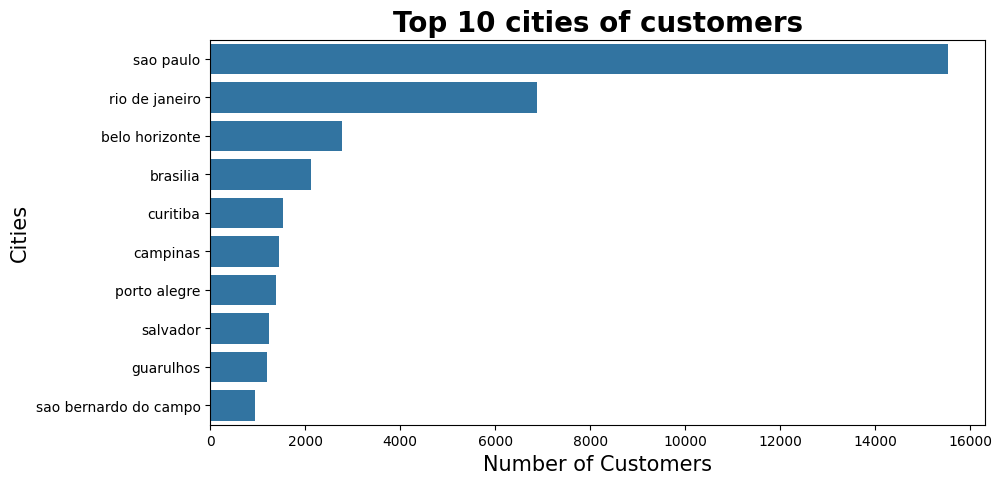

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y = customers.customer_city.value_counts().index[:10], x = customers.customer_city.value_counts().values[:10])
plt.xlabel('Number of Customers',color='black',fontsize=15)
plt.ylabel('Cities',color='black',fontsize=15)
plt.title('Top 10 cities of customers',color='black',fontsize=20,fontweight='bold')
plt.show()

observations:

1. The top city to which the customers belong is Sao Paulo, which account to 15.62% of customers.
2. This is followed by Rio De Janeiro, which accounts to 6.92% of customers.
3. The least city to which the customers belong to among the top 10 is from Sao Bernardo Do Campo, which accounts to just 0.94%.

### Visualization of top 10 States

In [ ]:
customerState = customers.customer_state.value_counts(normalize=True)[:10] * 100
print('The top 10 cities from which customers come are: \n', customerState)

The top 10 cities from which customers come are: 
 customer_state
SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
Name: proportion, dtype: float64


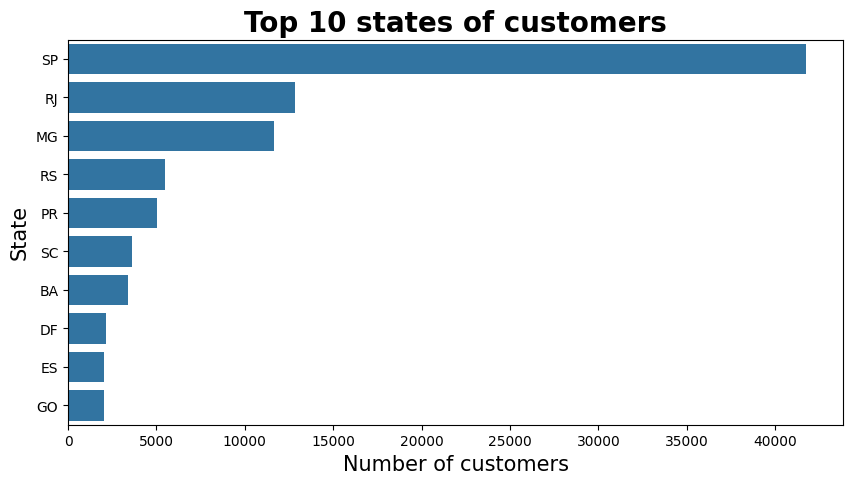

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y = customers.customer_state.value_counts().index[:10], x = customers.customer_state.value_counts().values[:10])
plt.xlabel('Number of customers',color='black',fontsize=15)
plt.ylabel('State',color='black',fontsize=15)
plt.title('Top 10 states of customers',color='black',fontsize=20,fontweight='bold')
plt.show()

observations:

1. The top state to which customers belong is Sao Paulo, from where 41.98% of customers come from.
2. This is followed by Rio De Janeiro, which accounts to 12.92% of customers.

### Visualization of Geolocation of Customers

In [ ]:
incorrectLocation = geolocation[(geolocation.geolocation_lat > 10) & (geolocation.geolocation_lng < -18)]
incorrectLocation

Empty DataFrame
Columns: [geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []

In [ ]:
geolocation.drop(index = [538512, 538557, 585242, 585260], inplace = True)

KeyError: '[538512, 538557, 585242, 585260] not found in axis'

Observations:

1. There are some records in the geolocation data for which the geolocation latitude and longitude are pointing to locations in the sea, which will lead to inappropriate visualization of the geolocation, when aggregation is applied to the fields.
2. So such records are alone dropped from the data.
3. Those records include geolocation zipcodes 29654 and 35179, for which the latitude and longitude values for certain records are incorrectly given.
4. Latitude greater than 10 degrees and longitude lesser than -18 degrees point to the sea.

In [ ]:
geolocationMean = geolocation.groupby('geolocation_zip_code_prefix', as_index = False).agg({'geolocation_lat'  : 'max',
                                                                                            'geolocation_lng'  : 'max'})
geolocationMean.head()

Observation:

1. Since there are many geographical coordinates given for a single geolocation zipcode, we consider the maximum value of the coordinate for a particular zipcode.

In [ ]:
customerDensity = customers.merge(geolocationMean, left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', how = 'left')[['customer_unique_id', 'customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
customerDensity.head()

In [ ]:
customerDensity.dropna(inplace = True)

observations:

1. The customer zip codes are mapped with the geolocation zip code's latitude and longidute, so as to visualise from which region our customers are more densly concentrated.
2. There are some zip codes for which the latitude and longitude values are not available in the data, so we drop such records for visualization.

In [ ]:
# create a map centered on your coordinates
m = folium.Map(location = customerDensity[['geolocation_lat', 'geolocation_lng']].values.tolist()[0], zoom_start = 13)

# create a list of coordinates
coordinates = customerDensity[['geolocation_lat', 'geolocation_lng']].values.tolist()

# create a heatmap layer with the list of coordinates
heat_layer = HeatMap(coordinates)

# add the heatmap layer to the map
heat_layer.add_to(m)

# display the map
m

observation:

1. From the heatmap, we could see that most of the customers are based out of South America, while some are from the Europe.

## Order Items - EDA

In [ ]:
orderItems.head(3)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93  
2  2018-01-18 14:48:30  199.0          17.87

In [ ]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
orderItems['shipping_limit_date'] = pd.to_datetime(orderItems.shipping_limit_date)

In [ ]:
orderItems.isna().sum() / len(orderItems) * 100

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [ ]:
orderItems.describe(exclude = np.number)

order_id                        product_id  \
count                             112650                            112650   
unique                             98666                             32951   
top     8272b63d03f5f79c56e9e4120aec44ef  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                                  21                               527   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

                               seller_id            shipping_limit_date  
count                             112650                         112650  
unique                              3095                            NaN  
top     6560211a19b47992c3666cc44a7e94c0                            NaN  
freq                                2033                            NaN  
mean                                 NaN  2018-01-07 15:36:52.192685312  
min                                  NaN            2016-09-19 00:15:34  
25%                                  NaN     2017-09-20 20:57:27.500000  
50%                                  NaN            2018-01-26 13:59:35  
75%                                  NaN  2018-05-10 14:34:00.750000128  
max                                  NaN            2020-04-09 22:35:08

In [ ]:
orderItems.describe()

order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value  
count  112650.000000  
mean       19.990320  
min         0.000000  
25%        13.080000  
50%        16.260000  
75%        21.150000  
max       409.680000  
std        15.806405

Observations:

1. The order items dataframe consist of all the orders placed by the customers and the details of the products in that order.
2. There are 98666 unique orders placed with the business and the order with most number of items is 8272b63d03f5f79c56e9e4120aec44ef, which has 21 items in a single order.
3. 32951 unique products were ordered during the taken time period and the most ordered product is aca2eb7d00ea1a7b8ebd4e68314663af, which was ordered 527 times. During the further stages of analysis, the product will be analysed mapping the ID with the products dataframe.
4. Similarly there are 3095 unique sellers for the product and the seller who sells most of the product is 6560211a19b47992c3666cc44a7e94c0. This data is also masked but we can combine this with geolocation and find which state or city the sellers belong to and do further analysis.
5. The average price of the products ordered is 120.65 Brazilian Reals. The price of the products ordered is highly right skewed, as the costliest product ordered is priced at 6735 Brazilian Reals.
6. Similarly the freight value of the order on an average for each order is 19.99 Brazilian Reals, and the expensive freight value is 409.68 Brazilian Reals. The particular orders whose freight values are higher will be studied later in the course of analysis.

### Visualization of Top 10 orders

In [ ]:
topOrders = orderItems.groupby('order_id', as_index = False).agg({'price'         : 'sum',
                                                                  'freight_value' : 'sum'})
topOrders['total_price'] = topOrders.price + topOrders.freight_value
top10Orders = topOrders.sort_values(by = 'total_price', ascending = False)[:10]
top10Orders

order_id    price  freight_value  total_price
1455   03caa2c082116e1d31e67e9ae3700499  13440.0         224.08     13664.08
44467  736e1922ae60d0d6a89247b851902527   7160.0         114.88      7274.88
3130   0812eb902a67711a1cb742b3cdaa65ae   6735.0         194.31      6929.31
98298  fefacc66af859508bf1a7934eab1e97f   6729.0         193.21      6922.21
94439  f5136e38d1a14a4dbd87dff67da82701   6499.0         227.66      6726.66
17114  2cc9089445046817a7539d90805e6e5a   5934.6         146.94      6081.54
65046  a96610ab360d42a2e5335a3998b4718a   4799.0         151.34      4950.34
69531  b4c4b76c642808cbe472a32b86cddc95   4599.9         209.54      4809.44
9868   199af31afc78c699f0dbf71fb178d4d4   4690.0          74.34      4764.34
54353  8dbc85d1447242f3b127dda390d56e19   4590.0          91.78      4681.78

### Visualization of top sellers of the orders placed by customers

In [ ]:
topSellers = orderItems.seller_id.value_counts()
topSellers.head()

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: count, dtype: int64

In [ ]:
topSellers = pd.DataFrame({'seller_id'     : topSellers.index,
                           'instances'     : topSellers.values})
topSellers.head()

seller_id  instances
0  6560211a19b47992c3666cc44a7e94c0       2033
1  4a3ca9315b744ce9f8e9374361493884       1987
2  1f50f920176fa81dab994f9023523100       1931
3  cc419e0650a3c5ba77189a1882b7556a       1775
4  da8622b14eb17ae2831f4ac5b9dab84a       1551

In [ ]:
topSellersOfOrders = topSellers.merge(sellers, on = 'seller_id').merge(geolocationMean, left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix').drop(columns = ['geolocation_zip_code_prefix'], axis = 1).sort_values('instances', ascending = False)
topSellersOfOrders.head()

seller_id  instances  seller_zip_code_prefix  \
0  6560211a19b47992c3666cc44a7e94c0       2033                    5849   
1  4a3ca9315b744ce9f8e9374361493884       1987                   14940   
2  1f50f920176fa81dab994f9023523100       1931                   15025   
3  cc419e0650a3c5ba77189a1882b7556a       1775                    9015   
4  da8622b14eb17ae2831f4ac5b9dab84a       1551                   13405   

             seller_city seller_state  geolocation_lat  geolocation_lng  
0              sao paulo           SP       -23.649432       -46.753466  
1               ibitinga           SP       -21.734663       -48.809349  
2  sao jose do rio preto           SP       -20.793902       -49.376768  
3            santo andre           SP       -23.653394       -46.513267  
4             piracicaba           SP       -22.692313       -47.653256

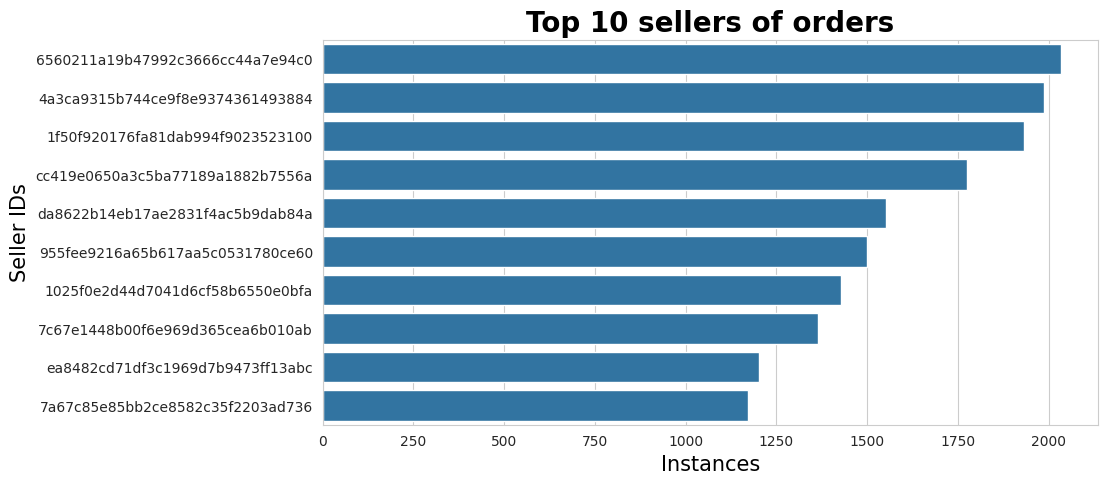

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x = topSellers.instances[:10], y = topSellers.seller_id[:10])
plt.xlabel('Instances',color='black',fontsize=15)
plt.ylabel('Seller IDs',color='black',fontsize=15)
plt.title('Top 10 sellers of orders',color='black',fontsize=20,fontweight='bold')
plt.show()

Observations:

1. Since the seller IDs are masked, we could not make out from what the seller ID means.
2. So we use the location and city of the sellers to draw inferences.

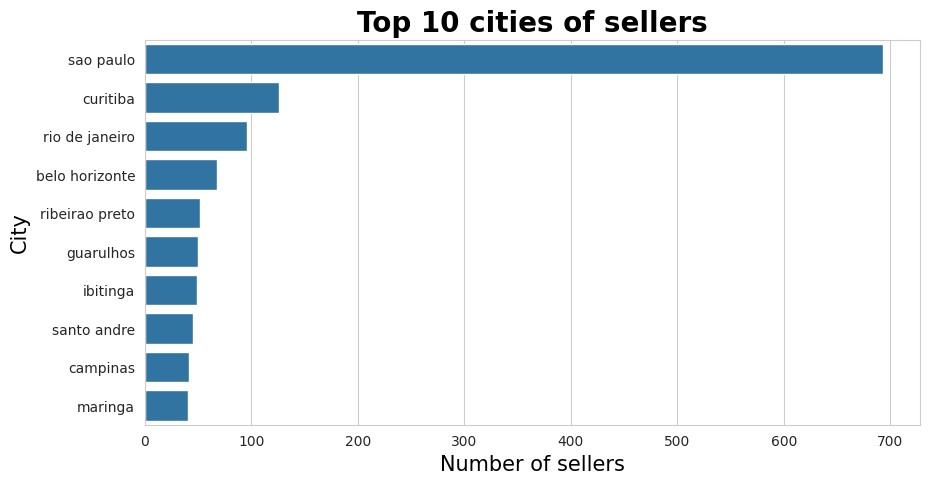

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y = topSellersOfOrders.seller_city.value_counts().index[:10], x = topSellersOfOrders.seller_city.value_counts().values[:10])
plt.xlabel('Number of sellers',color='black',fontsize=15)
plt.ylabel('City',color='black',fontsize=15)
plt.title('Top 10 cities of sellers',color='black',fontsize=20,fontweight='bold')
plt.show()

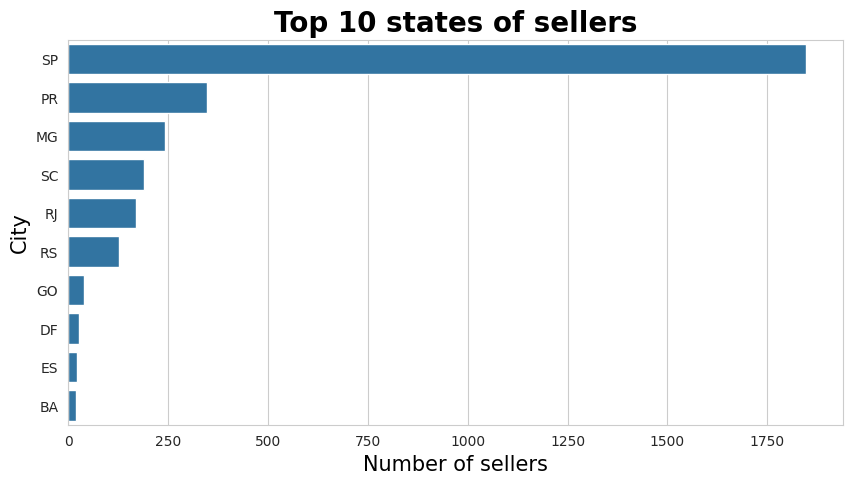

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y = topSellersOfOrders.seller_state.value_counts().index[:10], x = topSellersOfOrders.seller_state.value_counts().values[:10])
plt.xlabel('Number of sellers',color='black',fontsize=15)
plt.ylabel('City',color='black',fontsize=15)
plt.title('Top 10 states of sellers',color='black',fontsize=20,fontweight='bold')
plt.show()

Observations:

1. The sellers of orders are mostly from the city of Sao Paulo, followed by Curitiba and Rio De Janeiro.
2. The sellers of orders are mostly from the state of Sao Paulo.
3. This is obvious as most of the customers are from the same state and city of Sao Paulo.

In [ ]:
# create a map centered on your coordinates
m = folium.Map(location = topSellersOfOrders[['geolocation_lat', 'geolocation_lng']].values.tolist()[0], zoom_start = 13)

# create a list of coordinates
coordinates = topSellersOfOrders[['geolocation_lat', 'geolocation_lng']].values.tolist()

# create a heatmap layer with the list of coordinates
heat_layer = HeatMap(coordinates)

# add the heatmap layer to the map
heat_layer.add_to(m)

# display the map
m

Observation:

1. From the heatmap of the sellers based on their latitudes and longitudes, we could infer the concentration of sellers are only in South America. They carter to all of our customers spread in Europe and South America.

Distribution of price of the orders

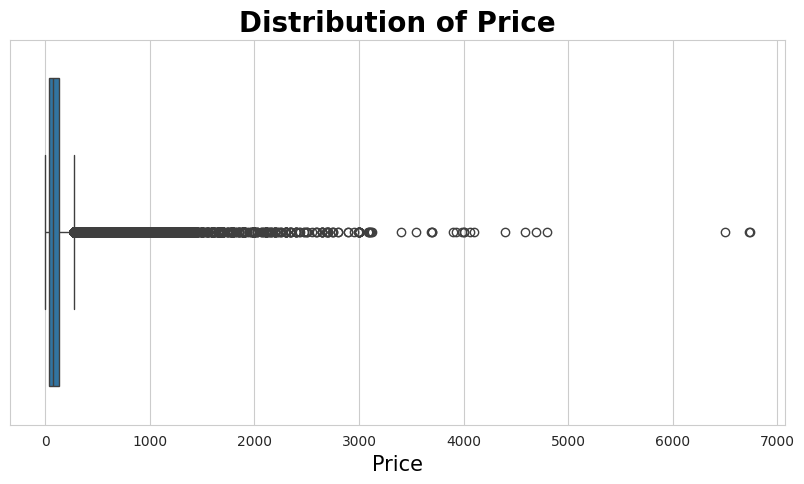

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price', data=orderItems)
plt.xlabel('Price',color='black',fontsize=15)
plt.title('Distribution of Price',color='black',fontsize=20,fontweight='bold')
plt.show()

Observations:

1. From the boxplot we could infer that the price of the products ordered is highly right skewed.
2. So as to view the spread of the price more clearly we will ignore the outliers and then find the distribution.

In [ ]:
Q1 = np.quantile(orderItems.price, 0.25)
Q3 = np.quantile(orderItems.price, 0.75)
IQR = Q3 - Q1
priceDistribution = orderItems[~((orderItems.price < Q1 - 1.5 * IQR) | (orderItems.price > Q3 + 1.5 * IQR))]
priceDistribution.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

<ipython-input-252-d3e8f0f96e0a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(priceDistribution.price)


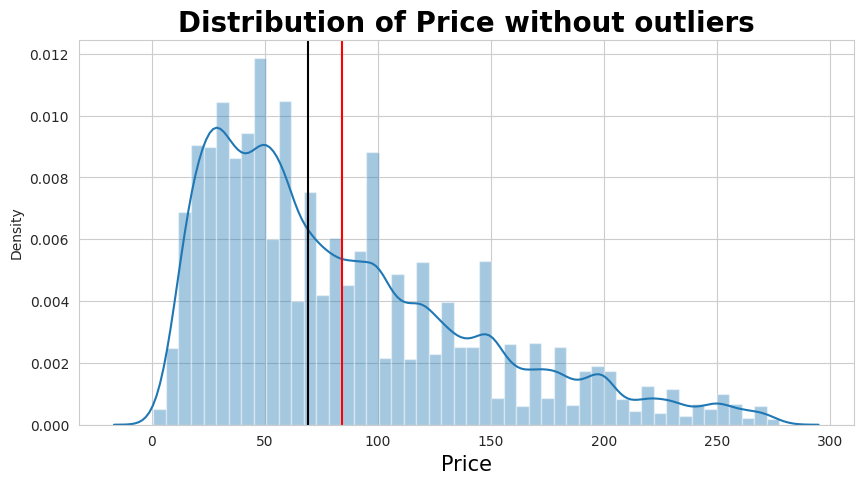

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(priceDistribution.price)
plt.axvline(priceDistribution.price.mean(), c = 'red')
plt.axvline(priceDistribution.price.median(), c = 'black')
plt.xlabel('Price',color='black',fontsize=15)
plt.title('Distribution of Price without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [ ]:
priceDistribution.price.describe()

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

Observations:

1. The price of the products within the interquartile range are spread mostly between 0 and 100 Brazilian Reals, which could be seen in the distribution plot.
2. The average price of the products is 83.97 Brazilian Reals.

Visualization of freight value of the orders

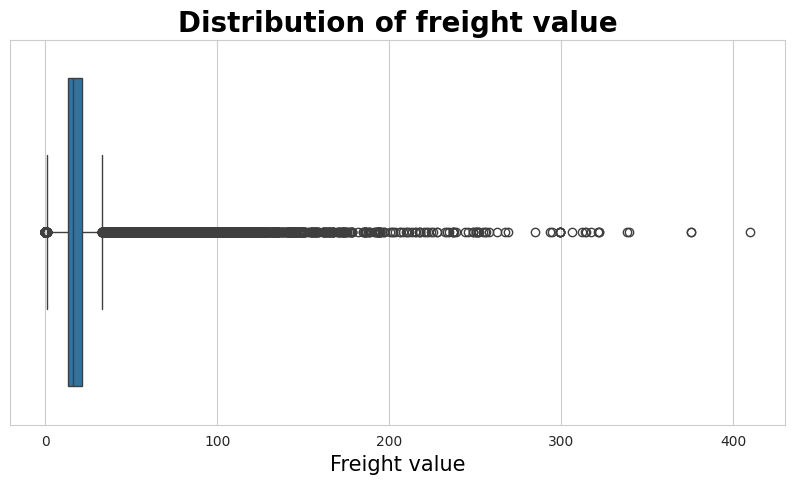

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='freight_value', data=orderItems)
plt.xlabel('Freight value',color='black',fontsize=15)
plt.title('Distribution of freight value',color='black',fontsize=20,fontweight='bold')
plt.show()

Observations:

1. From the boxplot we could infer that the freight value of the product ordered is highly right skewed.
2. So as to view the spread of the freight value more clearly we will ignore the outliers and then find the distribution.

In [ ]:
Q1 = np.quantile(orderItems.freight_value, 0.25)
Q3 = np.quantile(orderItems.freight_value, 0.75)
IQR = Q3 - Q1
freightValueDistribution = orderItems[~((orderItems.freight_value < Q1 - 1.5 * IQR) | (orderItems.freight_value > Q3 + 1.5 * IQR))]
freightValueDistribution.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

<ipython-input-256-610a2979ba1c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(freightValueDistribution.freight_value)


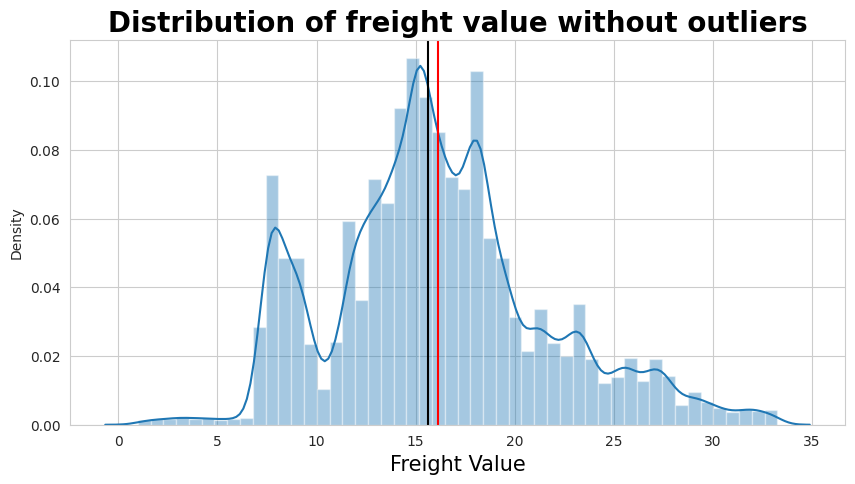

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(freightValueDistribution.freight_value)
plt.axvline(freightValueDistribution.freight_value.mean(), c = 'red')
plt.axvline(freightValueDistribution.freight_value.median(), c = 'black')
plt.xlabel('Freight Value',color='black',fontsize=15)
plt.title('Distribution of freight value without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [ ]:
freightValueDistribution.freight_value.describe()

count    100516.000000
mean         16.125685
std           5.468564
min           0.980000
25%          12.760000
50%          15.620000
75%          18.800000
max          33.250000
Name: freight_value, dtype: float64

Observations:

1. The freight values of the products within the interquartile range are spread mostly between 5 and 25, which could be seen in the distribution plot. We could infer that such orders were within the continent of South America.
2. The average freight value of the products is 16.12 Brazilian Reals.

## Payments - EDA

In [ ]:
payments.head(3)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71

In [ ]:
print('Number of Records:',payments.shape[0])
print('Number of Columns:',payments.shape[1])

Number of Records: 103886
Number of Columns: 5


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
payments.describe(include = np.number)

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [ ]:
payments.describe(exclude = np.number)

order_id payment_type
count                             103886       103886
unique                             99440            5
top     fa65dad1b0e818e3ccc5cb0e39231352  credit_card
freq                                  29        76795

Observations:

1. There is no presence of Null values in the payments dataframe.
2. Most of the payements were made through credit cards.
3. The average number of payment installments was 1, since it is highly right skewed, the mean is not considered. 24 was the maximum number of payment installments for an order.
4. The payment value of the orders is also highly right skewed. The average payment value is 154.1 Brazilian Reals.

### Visualization Of Different Payment types

In [ ]:
payments.payment_type.value_counts(normalize = True) * 100

payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64

Observations:

1. From the count plot, we cound clearly see that credit card accounts for 73.9% of payments, which is the most preferred payment type, followed by boleto, voucher and debit card.
2. There is imbalance present in the data as most of the payment types are of credit cards.

### Distribution of Number of Payment Installments

In [ ]:
payments.payment_installments.value_counts(normalize = True)[:10] * 100

payment_installments
1     50.580444
2     11.948675
3     10.069692
4      6.832489
10     5.128699
5      5.043028
8      4.108350
6      3.773367
7      1.565177
9      0.619910
Name: proportion, dtype: float64

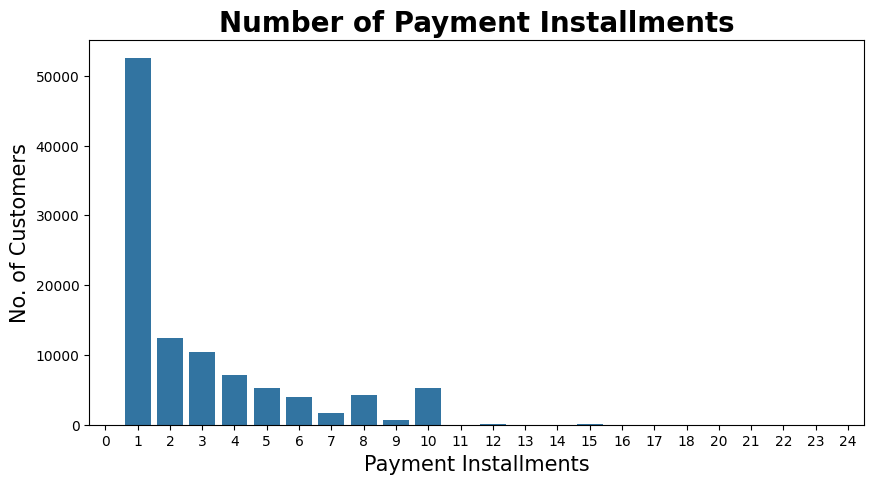

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='payment_installments',data=payments)
plt.title('Number of Payment Installments',fontweight='bold',fontsize=20)
plt.xlabel('Payment Installments',fontsize=15,color='black')
plt.ylabel('No. of Customers',fontsize=15,color='black')
plt.show()


Observations:

1. Most customers prefered to pay for the order in a single installment. However, customers also opted for more than one installment, the number is not insignificant.
2. For further analysis, we could convert the installments to an object datatype as we could not consider it as a numeric column.

### Distribution of the payment value of the orders

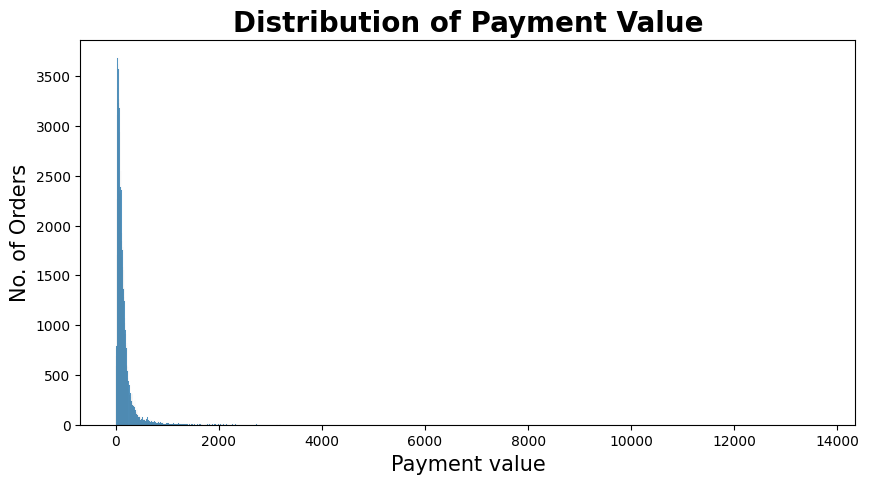

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='payment_value', data=payments)
plt.title('Distribution of Payment Value',fontweight='bold',fontsize=20)
plt.xlabel('Payment value',fontsize=15)
plt.ylabel('No. of Orders',fontsize=15)
plt.show()

In [ ]:
Q1 = np.quantile(payments.payment_value, 0.25)
Q3 = np.quantile(payments.payment_value, 0.75)
IQR = Q3 - Q1
paymentValueDistribution = payments[~((payments.payment_value < Q1 - 1.5 * IQR) | (payments.payment_value > Q3 + 1.5 * IQR))]
paymentValueDistribution.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

<ipython-input-171-5de0d60fd5e2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(paymentValueDistribution.payment_value)


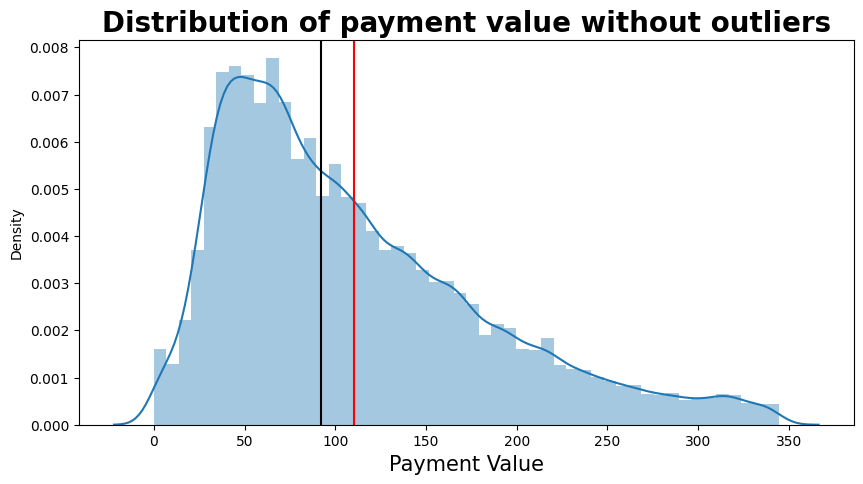

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(paymentValueDistribution.payment_value)
plt.axvline(paymentValueDistribution.payment_value.mean(), c = 'red')
plt.axvline(paymentValueDistribution.payment_value.median(), c = 'black')
plt.xlabel('Payment Value',color='black',fontsize=15)
plt.title('Distribution of payment value without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [ ]:
paymentValueDistribution.payment_value.describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

Observations:

1. The payment values of the orders within the interquartile range are spread mostly between 0 and 200, which could be seen in the distribution plot.
2. The average payment value for the orders is 110.06 Brazilian Reals.

## Reviews - EDA

In [ ]:
orderReviews.head(3)

review_id                          order_id  \
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
19  373cbeecea8286a2b66c97b1b157ec46  583174fbe37d3d5f0d6661be3aad1786   

    review_score     review_comment_title  \
9              4                recomendo   
15             5          Super recomendo   
19             1  Não chegou meu produto    

                               review_comment_message review_creation_date  \
9   aparelho eficiente. no site a marca do aparelh...           2018-05-22   
15  Vendedor confiável, produto ok e entrega antes...           2018-05-23   
19                                            Péssimo           2018-08-15   

   review_answer_timestamp  
9      2018-05-23 16:45:47  
15     2018-05-24 03:00:01  
19     2018-08-15 04:10:37

In [ ]:
print('Number of records:',orderReviews.shape[0])
print('number of columns:',orderReviews.shape[1])

Number of records: 9839
number of columns: 7


In [ ]:
orderReviews['review_answer_timestamp'] = pd.to_datetime(orderReviews.review_answer_timestamp)
orderReviews['review_creation_date'] = pd.to_datetime(orderReviews.review_creation_date)

In [ ]:
orderReviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9839 entries, 9 to 99200
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                9839 non-null   object        
 1   order_id                 9839 non-null   object        
 2   review_score             9839 non-null   int64         
 3   review_comment_title     9839 non-null   object        
 4   review_comment_message   9839 non-null   object        
 5   review_creation_date     9839 non-null   datetime64[ns]
 6   review_answer_timestamp  9839 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 614.9+ KB


In [ ]:
orderReviews.isna().sum()[orderReviews.isna().sum() > 0] / len(orderReviews) * 100

Series([], dtype: float64)

Observations:

1. There are 88.34% of review_comment_title and 58.7% of review_comment_message as null values.
2. We are dropping the null values.

In [ ]:
orderReviews.dropna(inplace = True)

In [ ]:
reviewScore = orderReviews.review_score.value_counts(normalize = True) * 100
reviewScore

review_score
5    55.107226
1    18.182742
4    14.564488
3     7.490599
2     4.654945
Name: proportion, dtype: float64

Observations:

1. From the count plot of review score, we could clearly see that for about 57.77% of orders, the review score is 5, which is the maximum review score.
2. From this we could clearly see that customers were mostly satisfied by the products and the business.

### Comparison of review scores of on-time and late deliveries

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'purchased_approved', 'approved_carrier', 'carrier_delivered',
       'delivered_estimated', 'purchased_delivered'],
      dtype='object')

In [ ]:
reviewScoreAnalysis = orderReviews[['order_id', 'review_score']].merge(orders[['order_id', 'purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']], on = 'order_id')
reviewScoreAnalysis.head()

order_id  review_score  purchased_approved  \
0  b9bf720beb4ab3728760088589c62129             4                 525   
1  e51478e7e277a83743b6f9991dbfa3fb             5                 883   
2  37e7875cdce5a9e5b3a692971f370151             4                3042   
3  e029f708df3cc108b3264558771605c6             5                1221   
4  e2e6ee1ed2d7f2f36b05d234983bd7a0             5               74123   

   approved_carrier  carrier_delivered  delivered_estimated  \
0                 0                  6                   15   
1                 0                  3                   15   
2                 3                 16                    7   
3                 4                  7                   16   
4                 2                  7                    7   

   purchased_delivered  
0                    7  
1                    3  
2                   19  
3                   11  
4                   11

In [ ]:
ontimeDelivery_review = reviewScoreAnalysis[reviewScoreAnalysis.delivered_estimated > 0][['review_score', 'purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']].mean()
lateDelivery_review = reviewScoreAnalysis[reviewScoreAnalysis.delivered_estimated < 0][['review_score', 'purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']].mean()
comparision_review = pd.DataFrame([ontimeDelivery_review, lateDelivery_review]).T
comparision_review.rename(columns = {0 : 'on time delivery', 1 : 'late delivery'}, inplace = True)
comparision_review

on time delivery  late delivery
review_score                 4.040577       2.577267
purchased_approved       14923.547788   18692.007663
approved_carrier             1.810071       4.840358
carrier_delivered            6.335004      19.363985
delivered_estimated         13.512100      -7.748404
purchased_delivered          8.939012      25.163474

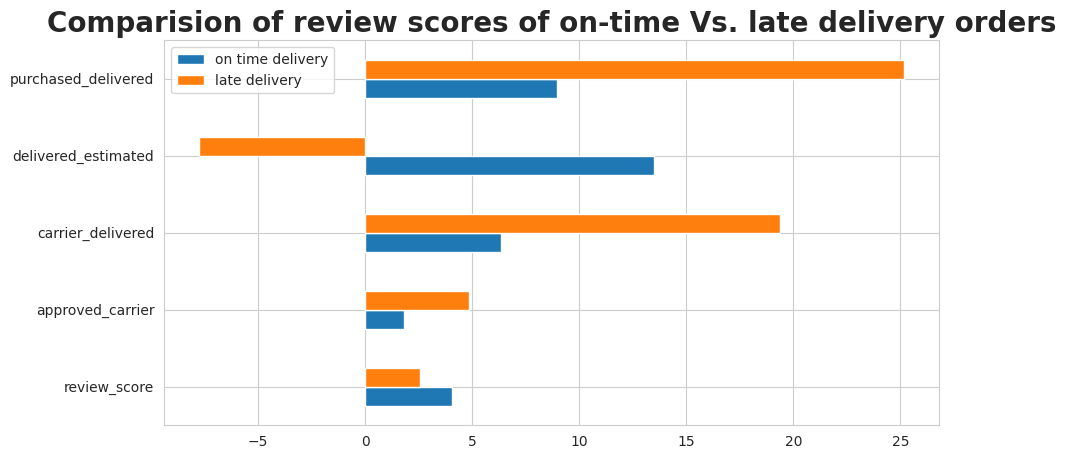

In [ ]:
comparision_review.drop('purchased_approved').plot(kind = 'barh', figsize = (10, 5))
plt.title('Comparision of review scores of on-time Vs. late delivery orders',fontweight='bold',fontsize=20)
plt.show()

Observations:

1. The review scores of late deliveries was 2.5 while for on-time deliveries it was 4 on an average.
2. It took 25 days on an average for the orders to get delivered to the customers for late delivery orders, while it took just 9 days for on-time delivery orders.
3. On an average, orders were delivered 14 days before the estimated date of delivery for on-time delivered orders.
4. It also took extra hour for the orders to get approved for orders which were delivered late.

### Top comments by the customers

In [ ]:
topComments = orderReviews.review_comment_title.value_counts()[:10]
print('The top 20 comments by the customer are:',topComments,sep='\n')

The top 20 comments by the customer are:
review_comment_title
Recomendo          354
recomendo          270
Bom                228
super recomendo    213
Excelente          203
Ótimo              193
Muito bom          192
Super recomendo    184
Ótimo              149
Otimo              133
Name: count, dtype: int64


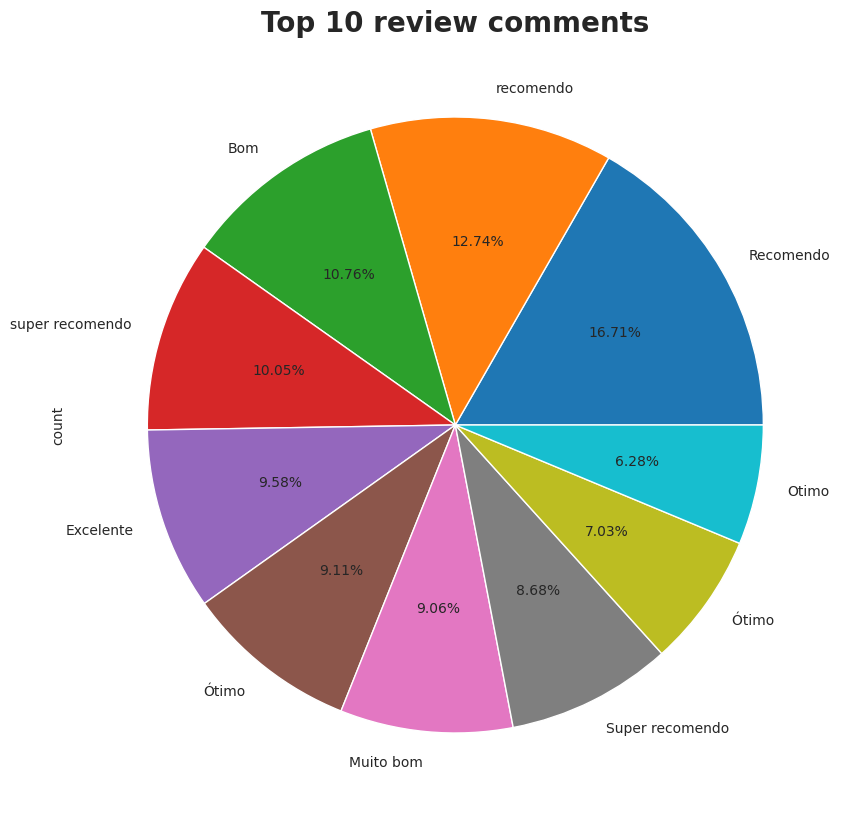

In [ ]:
topComments.plot(kind="pie",autopct="%2.2f%%",figsize=(10, 10))
plt.title('Top 10 review comments',fontweight='bold',fontsize=20)
plt.show()

Observations:

1. The most occuring comment is Recomendo, Bom, super recomendo and excelente.
2. Recommedo is about 11.93%.

In [ ]:
def partition(x):
    if x < 3:
        return 0
    return 1

orderReviewsAnalysis = orderReviews.copy()
orderReviewsAnalysis['review_score']=orderReviewsAnalysis['review_score'].map(lambda cw : partition(cw) )

# checking the review score now
orderReviewsAnalysis.review_score.value_counts()

review_score
1    7592
0    2247
Name: count, dtype: int64

Total Positive Reviews : 7592 , ( 77.16231324321578 %)
Total Negative Reviews : 2247 , ( 22.837686756784226 %)




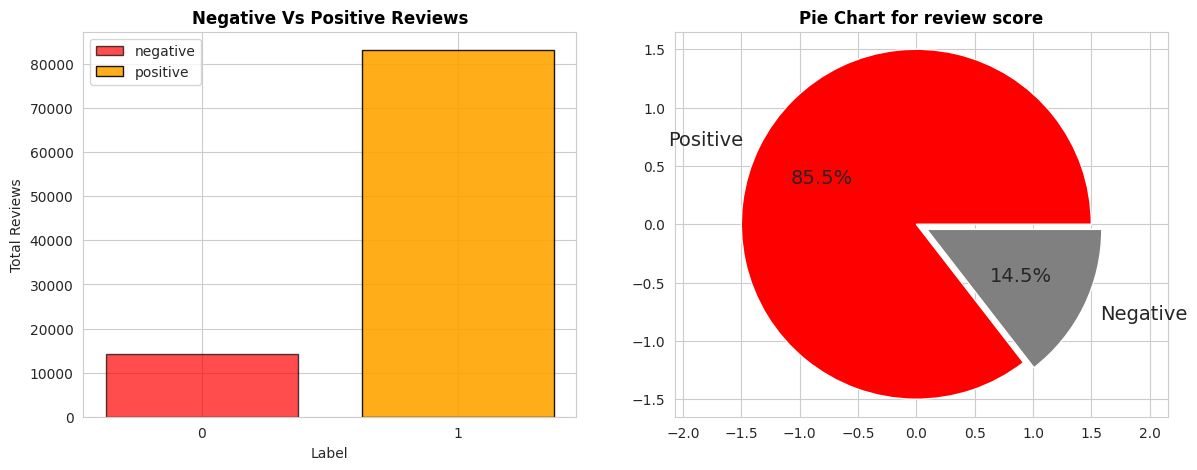

In [ ]:
#counting the review score with 1 and 0
y_value_counts = orderReviewsAnalysis.review_score.value_counts()

#calculating the percentage of each review type
print("Total Positive Reviews :", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total Negative Reviews :", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print('\n')

#plotting bar-plot and pie chart
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total Reviews')
plt.xlabel('Label')
plt.title('Negative Vs Positive Reviews',color='black',fontweight='bold')
plt.xticks([10,10.20],['0','1'])
#creating bar plots
plt.bar(10,14112, color = 'red', width = 0.15,alpha=0.7,label='negative',edgecolor='black')
plt.bar(10.20,83143,color = 'orange', width = 0.15,alpha=0.9,label='positive',edgecolor='black')
plt.legend()

plt.subplot(1,2,2)
labels = ['Positive','Negative']
sizes = [83143,14112]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
color={'Red','grey'}
plt.pie(sizes,explode=explode ,colors=color,labels=labels, autopct='%1.1f%%',shadow=False, startangle=0,radius=1.5,labeldistance=1.1,textprops={'fontsize': 14},frame=True, )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for review score',color='black',fontweight='bold')
plt.show()

Observations:

1. Review scores below 3 are considered as negative reviews and above 3 are said to be positive reviews.
2. We can observe from the above plots 85.5% of the total reviews are positive and only 14.5% reviews are negative.

## Revenue Generated

### Year-wise number of orders

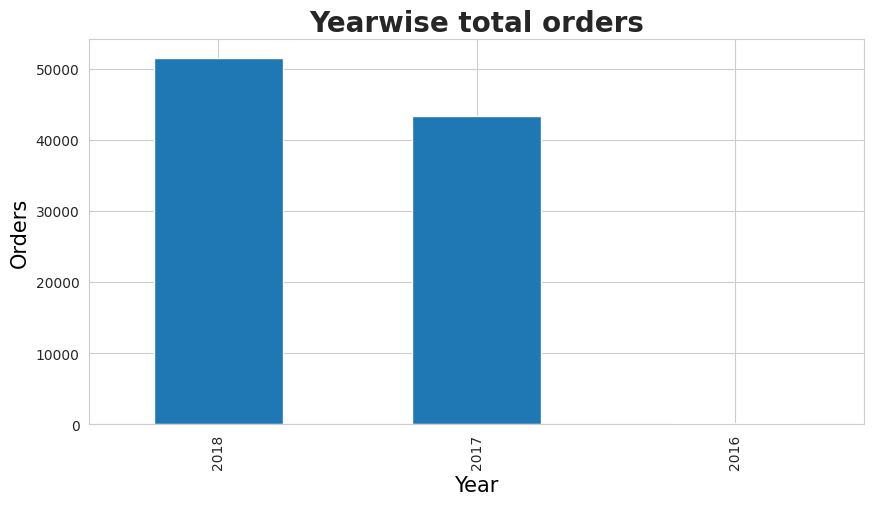

In [ ]:
plt.figure(figsize=(10, 5))
pd.to_datetime(orders.order_purchase_timestamp).dt.year.value_counts().plot(kind='bar')
plt.title('Yearwise total orders',fontweight='bold',fontsize=20)
plt.xlabel('Year',fontsize=15,color='black')
plt.ylabel('Orders',fontsize=15,color='black')
plt.show()


Observation:

1. The year of 2018 is when most orders were placed.

### Month-wise revenue for the years 2017 and 2018

In [ ]:
def is_late_delivery(Days):
    if Days < 0:
        return 1
    else:
        return 0

In [ ]:
def is_ontime_delivery(Days):
    if Days > 0:
        return 1
    else:
        return 0

In [ ]:
year2016 = orders[orders.order_purchase_timestamp.dt.year == 2016].merge(orderItems, on = 'order_id')
year2016['Month'] = year2016.order_purchase_timestamp.dt.month
year2016['isLateDelivery'] = year2016['delivered_estimated'].apply(is_late_delivery)
year2016['isOnTimeDelivery'] = year2016['delivered_estimated'].apply(is_ontime_delivery)
revenue2016 = year2016.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum', 'purchased_approved' : 'mean', 'carrier_delivered' : 'mean', 'delivered_estimated' : 'mean', 'purchased_delivered' : 'mean', 'isLateDelivery' : 'sum', 'isOnTimeDelivery' : 'sum'})
revenue2016['total_revenue'] = revenue2016.price + revenue2016.freight_value
revenue2016['lateDeliveryRate'] = revenue2016['isLateDelivery'] / (revenue2016['isLateDelivery'] + revenue2016['isOnTimeDelivery'])
revenue2016

order_id     price  freight_value  purchased_approved  \
Month                                                          
9             1    134.97           8.49            0.000000   
10          261  39738.17        6093.65        31555.386364   
12            1     10.90           8.72          890.000000   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
9                1.00000           -37.000000            54.000000   
10               5.62013            35.798701            19.198052   
12               1.00000            21.000000             4.000000   

       isLateDelivery  isOnTimeDelivery  total_revenue  lateDeliveryRate  
Month                                                                     
9                   3                 0         143.46          1.000000  
10                  3               304       45831.82          0.009772  
12                  0                 1          19.62          0.000000

In [ ]:
year2017 = orders[orders.order_purchase_timestamp.dt.year == 2017].merge(orderItems, on = 'order_id')
year2017['Month'] = year2017.order_purchase_timestamp.dt.month
year2017['isLateDelivery'] = year2017['delivered_estimated'].apply(is_late_delivery)
year2017['isOnTimeDelivery'] = year2017['delivered_estimated'].apply(is_ontime_delivery)
revenue2017 = year2017.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum', 'purchased_approved' : 'mean', 'carrier_delivered' : 'mean', 'delivered_estimated' : 'mean', 'purchased_delivered' : 'mean', 'isLateDelivery' : 'sum', 'isOnTimeDelivery' : 'sum'})
revenue2017['total_revenue'] = revenue2017.price + revenue2017.freight_value
revenue2017['lateDeliveryRate'] = revenue2017['isLateDelivery'] / (revenue2017['isLateDelivery'] + revenue2017['isOnTimeDelivery'])
revenue2017

order_id      price  freight_value  purchased_approved  \
Month                                                           
1           749  111609.71       15666.01        14288.871570   
2          1650  233716.91       36938.42        11139.714517   
3          2545  359109.85       55107.03         6177.327807   
4          2279  338839.16       49652.13        13151.595351   
5          3531  488010.45       77258.11        13569.175069   
6          3130  421310.97       68013.90        13466.575079   
7          3841  478598.50       83898.01        13519.357536   
8          4190  553928.41       90976.11        12527.191103   
9          4137  604764.74       93400.02        12330.243381   
10         4478  648247.65      102869.36        13479.104910   
11         7288  987510.37      165582.29        14508.177956   
12         5508  725558.51      116955.07        14256.016502   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
1               8.701427            26.734358            12.072448   
2               9.002698            18.165677            12.634107   
3               9.364421            11.439724            12.427634   
4              10.679669            12.108747            14.328211   
5               7.937296            12.395535            10.899172   
6               8.357450            11.719782            11.451622   
7               7.850893            11.586578            11.021530   
8               7.345447            12.344612            10.482038   
9               8.105910            10.435077            11.404787   
10              7.766206            10.992712            11.264097   
11             10.384470             7.281449            14.579301   
12             10.947581            12.104352            14.781427   

       isLateDelivery  isOnTimeDelivery  total_revenue  lateDeliveryRate  
Month                                                                     
1                  26               885      127275.72          0.028540  
2                  62              1787      270655.33          0.033532  
3                 163              2717      414216.88          0.056597  
4                 191              2322      388491.29          0.076005  
5                 151              3810      565268.56          0.038122  
6                 130              3332      489324.87          0.037551  
7                 160              4175      562496.51          0.036909  
8                 151              4603      644904.52          0.031763  
9                 242              4414      698164.76          0.051976  
10                264              4898      751117.01          0.051143  
11               1172              7138     1153092.66          0.141035  
12                504              5619      842513.58          0.082313

In [ ]:
year2018 = orders[orders.order_purchase_timestamp.dt.year == 2018].merge(orderItems, on = 'order_id')
year2018['Month'] = year2018.order_purchase_timestamp.dt.month
year2018['isLateDelivery'] = year2018['delivered_estimated'].apply(is_late_delivery)
year2018['isOnTimeDelivery'] = year2018['delivered_estimated'].apply(is_ontime_delivery)
revenue2018 = year2018.groupby('Month').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum', 'purchased_approved' : 'mean', 'carrier_delivered' : 'mean', 'delivered_estimated' : 'mean', 'purchased_delivered' : 'mean', 'isLateDelivery' : 'sum', 'isOnTimeDelivery' : 'sum'})
revenue2018['total_revenue'] = revenue2018.price + revenue2018.freight_value
revenue2018['lateDeliveryRate'] = revenue2018['isLateDelivery'] / (revenue2018['isLateDelivery'] + revenue2018['isOnTimeDelivery'])
revenue2018

order_id      price  freight_value  purchased_approved  \
Month                                                           
1          7045  922192.60      152670.38        15841.367146   
2          6543  824207.87      139455.59        14366.830757   
3          7001  953311.25      167215.46        13605.120274   
4          6409  923081.83      150642.10        17088.306233   
5          6681  966547.76      149446.94        14948.900233   
6          5976  840156.23      152896.15        12594.163708   
7          5596  797173.38      146234.44        17851.038383   
8          6265  828540.84      144748.47        14523.856960   

       carrier_delivered  delivered_estimated  purchased_delivered  \
Month                                                                
1               9.854841            12.010618            13.656090   
2              12.700693             7.361940            16.481210   
3              12.128759             5.799750            15.604741   
4               8.035366            11.935772            11.014770   
5               8.282220            11.342262            10.878106   
6               6.197031            18.297293             8.667055   
7               5.668773            10.189228             8.623914   
8               4.817653             7.402441             7.262097   

       isLateDelivery  isOnTimeDelivery  total_revenue  lateDeliveryRate  
Month                                                                     
1                 525              7405     1074862.98          0.066204  
2                1183              6173      963663.46          0.160821  
3                1641              6190     1120526.71          0.209552  
4                 368              6948     1073723.93          0.050301  
5                 618              6980     1115994.70          0.081337  
6                  93              6771      993052.38          0.013549  
7                 294              5949      943407.82          0.047093  
8                 735              5908      973289.31          0.110643

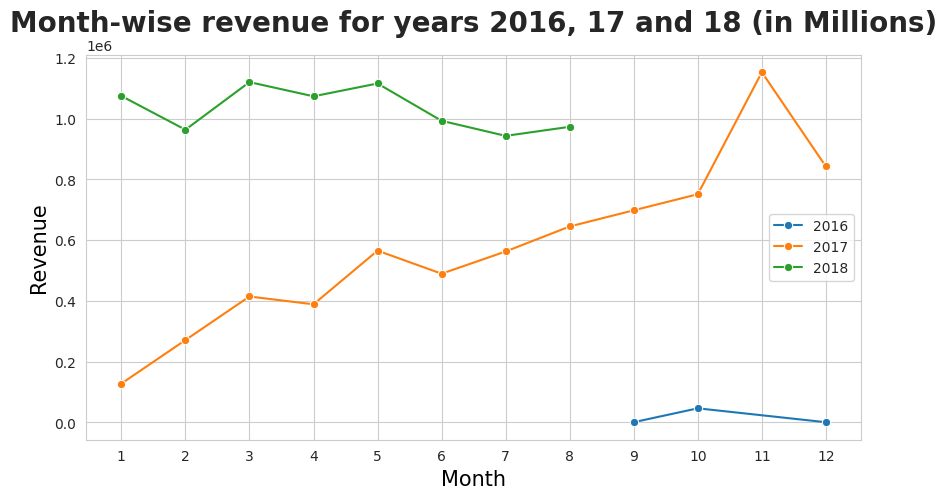

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2016['total_revenue'], x = revenue2016.index, marker = 'o', label = '2016')
sns.lineplot(y = revenue2017['total_revenue'], x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['total_revenue'], x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise revenue for years 2016, 17 and 18 (in Millions)',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Revenue',fontsize=15,color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

Observations:

1. There are not many records available for the year 2016, so the revenue is also less. Therefore we consider only the records from the year 2017 to the available records upto August of 2018 for our analysis.
2. From the available data, it is clearly evident that the revenue grew constantly all throughout the year 2017, starting from 127K Brazilian Real all the way upto 1.15M Brazilian Real during the month of November 2017.
3. There was a dip in the revenue of around 310K Brazilian Real in the month of December 2017.
4. The year 2018 saw a constant revenue flow which was in the range of 966K - 1.13M Brazilian Real.
5. The revenue is in correspondance with the number of orders placed.

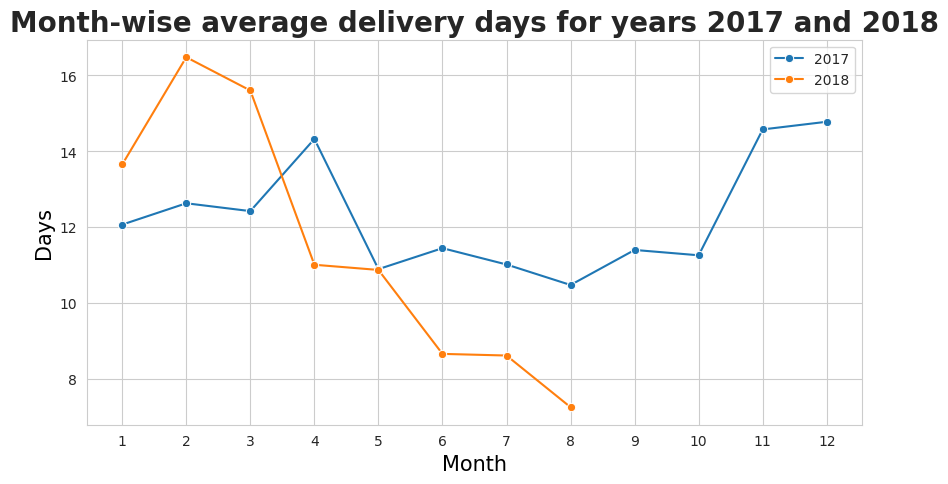

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017['purchased_delivered'], x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['purchased_delivered'], x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise average delivery days for years 2017 and 2018',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Days',fontsize=15,color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

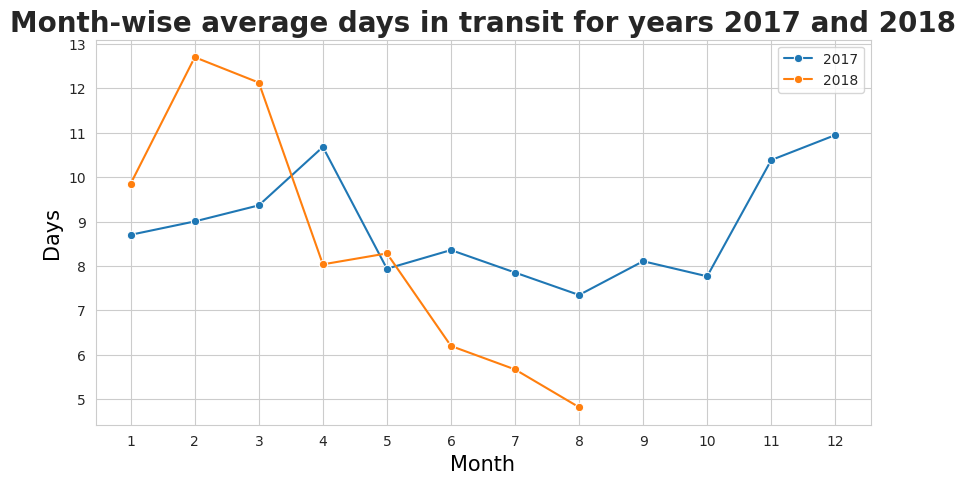

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017['carrier_delivered'], x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['carrier_delivered'], x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise average days in transit for years 2017 and 2018',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Days',fontsize=15,color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

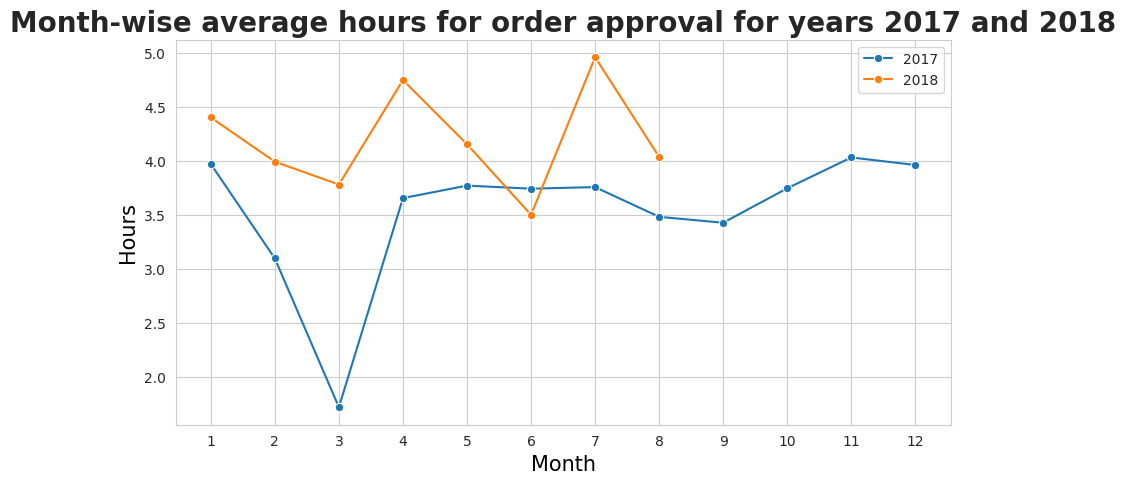

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017['purchased_approved']/3600, x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['purchased_approved']/3600, x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise average hours for order approval for years 2017 and 2018',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Hours',fontsize=15,color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

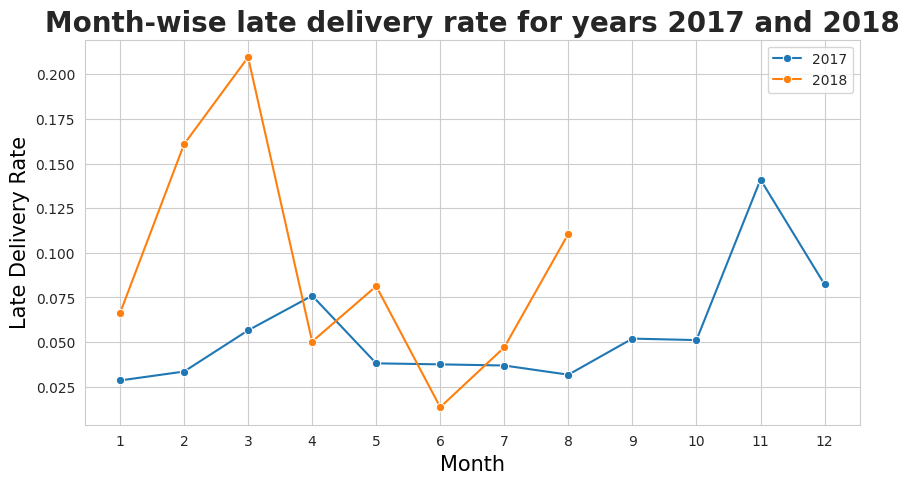

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = revenue2017['lateDeliveryRate'], x = revenue2017.index, marker = 'o', label = '2017')
sns.lineplot(y = revenue2018['lateDeliveryRate'], x = revenue2018.index, marker = 'o', label = '2018')
plt.title('Month-wise late delivery rate for years 2017 and 2018',fontweight='bold',fontsize=20)
plt.xlabel('Month',fontsize=15,color='black')
plt.ylabel('Late Delivery Rate',fontsize=15,color='black')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.legend()
plt.show()

Observations:

1. The data for the year 2016 was very less so we do not consider it for interpretation.
2. The rise in revenue is in accordance with the number of days it took on an average for the orders to get delivered to the customers and also the number of days it took on an average while the orders were in transit.
3. This clearly indicates that the business thrives only based on the less number of days it takes for the order to get delivered.
4. Optimising the delivery days would actually help in increasing the revenue and help sustain the business over years.
5. The graphs clearly indicate that on periods when there were huge numbers of orders, the average delivery time was also comparatively high, which indicates that proper measures should be undertaken to carter fast delivery of products.
6. The only viable method would be to invest in transit and delivery partners.
7. Hours taken for the order to get approved does not have any impact on the business.

Business Recommendations:

1. Increase cross-docking centres for first mile delivery.
2. Introduce product traceability.
3. Optimize the inventory management for fast approval of orders.
4. Know target customers and increase their satisfaction.
5. Invest in delivery partners and transit.

### Quarter-wise revenue

In [ ]:
quarters2017 = pd.DataFrame(columns = ['total_revenue'])
quarters2018 = pd.DataFrame(columns = ['total_revenue'])
quarters2017.loc['Q1'] = [sum(revenue2017.total_revenue[:3])]
quarters2017.loc['Q2'] = [sum(revenue2017.total_revenue[3:6])]
quarters2017.loc['Q3'] = [sum(revenue2017.total_revenue[6:9])]
quarters2017.loc['Q4'] = [sum(revenue2017.total_revenue[9:])]
quarters2018.loc['Q1'] = [sum(revenue2018.total_revenue[:3])]
quarters2018.loc['Q2'] = [sum(revenue2018.total_revenue[3:6])]

In [ ]:
quarters2017

total_revenue
Q1      812147.93
Q2     1443084.72
Q3     1905565.79
Q4     2746723.25

In [ ]:
quarters2018

total_revenue
Q1     3159053.15
Q2     3182771.01

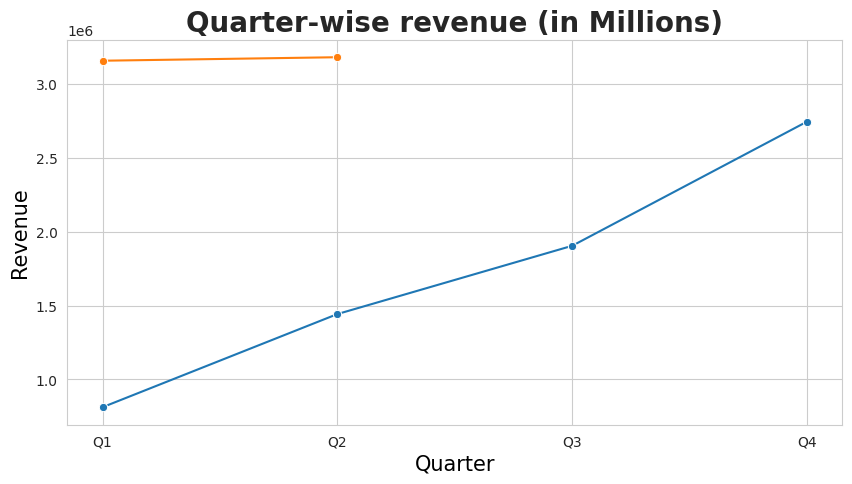

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(y = quarters2017['total_revenue'], x = quarters2017.index, marker = 'o')
sns.lineplot(y = quarters2018['total_revenue'], x = quarters2018.index, marker = 'o')
plt.title('Quarter-wise revenue (in Millions)',fontweight='bold',fontsize=20)
plt.xlabel('Quarter',fontsize=15,color='black')
plt.ylabel('Revenue',fontsize=15,color='black')
plt.show()

Observations:

1. We only see the records for the quarters Q1 of FY2017 to Q2 of FY2018 as they are the available records.
2. The revenue was on the rise during this period, which stood at a high of 3.27M Brazilian Real at Q2 of FY2018.
3. Comparing the first and second quarters of financial years 2017 and 2018 respectively, we find that the revenue increased very drastically, which says the business is on the uprising.

## Black Friday Sale

### Analysis of sales during November 2017

Observations:

1. The sales during the month of November and December 2017 is alone studied extensively because it was the month that saw the highest revenue generated, and which was followed by a sudden dip in revenue the very next month.
2. It is also in connection with the Black Friday Sale which was on Friday, 24th of November 2017.

In [ ]:
november2017 = year2017[year2017.order_purchase_timestamp.dt.month == 11]
november2017['Date'] = november2017.order_purchase_timestamp.dt.day
november2017.head()

<ipython-input-309-ce289686b712>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  november2017['Date'] = november2017.order_purchase_timestamp.dt.day


order_id                       customer_id  \
1   949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
10  85ce859fd6dc634de8d2f1e290444043  059f7fc5719c7da6cbafe370971a8d70   
17  6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
26  68873cf91053cd11e6b49a766db5af1a  4632eb5a8f175f6fe020520ae0c678f3   
27  8f06cc6465925031568537b815f1198d  9916715c2ab6ee1710c9c32f0a534ad2   

   order_status order_purchase_timestamp   order_approved_at  \
1     delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
10    delivered      2017-11-21 00:03:41 2017-11-21 00:14:22   
17    delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
26    delivered      2017-11-30 22:02:15 2017-12-02 02:51:18   
27    delivered      2017-11-15 11:31:41 2017-11-15 11:46:42   

   order_delivered_carrier_date order_delivered_customer_date  \
1           2017-11-22 13:39:59           2017-12-02 00:28:42   
10          2017-11-23 21:32:26           2017-11-27 18:28:00   
17          2017-12-13 21:14:05           2017-12-28 18:59:23   
26          2017-12-04 22:07:01           2017-12-05 20:28:40   
27          2017-11-16 22:03:00           2017-11-22 22:41:07   

   order_estimated_delivery_date  purchased_approved  approved_carrier  ...  \
1                     2017-12-15                1073                 3  ...   
10                    2017-12-11                 641                 2  ...   
17                    2017-12-21               10401                18  ...   
26                    2017-12-18               17343                 2  ...   
27                    2017-12-05                 901                 1  ...   

    order_item_id                        product_id  \
1               1  d0b61bfb1de832b15ba9d266ca96e5b0   
10              1  cce679660c66e6fbd5c8091dfd29e9cd   
17              1  be021417a6acb56b9b50d3fd2714baa8   
26              1  15a9e834e89eab39d973492882c658d6   
27              1  12087840651e83b48206b82c213b76fd   

                           seller_id  shipping_limit_date  price  \
1   66922902710d126a0e7d26b0e3805106  2017-11-23 19:45:59   45.0   
10  d2374cbcbb3ca4ab1086534108cc3ab7  2017-11-29 00:14:22   17.9   
17  f5f46307a4d15880ca14fab4ad9dfc9b  2017-11-30 00:21:09  339.0   
26  a673821011d0cec28146ea42f5ab767f  2017-12-07 02:51:18   79.9   
27  5b925e1d006e9476d738aa200751b73b  2017-11-21 11:46:42  299.0   

   freight_value Month  isLateDelivery  isOnTimeDelivery  Date  
1          27.20    11               0                 1    18  
10         11.85    11               0                 1    21  
17         17.12    11               1                 0    24  
26         11.76    11               0                 1    30  
27         18.34    11               0                 1    15  

[5 rows x 23 columns]

In [ ]:
blackfriday = november2017[november2017['Date']==24]
blackfriday.head()

order_id                       customer_id  \
17   6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
59   b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
60   b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
115  c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   
116  c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   

    order_status order_purchase_timestamp   order_approved_at  \
17     delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
59     delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
60     delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
115    delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   
116    delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   

    order_delivered_carrier_date order_delivered_customer_date  \
17           2017-12-13 21:14:05           2017-12-28 18:59:23   
59           2017-11-28 22:37:15           2017-12-01 21:11:40   
60           2017-11-28 22:37:15           2017-12-01 21:11:40   
115          2017-12-08 23:28:26           2017-12-18 20:24:54   
116          2017-12-08 23:28:26           2017-12-18 20:24:54   

    order_estimated_delivery_date  purchased_approved  approved_carrier  ...  \
17                     2017-12-21               10401                18  ...   
59                     2017-12-15               12981                 3  ...   
60                     2017-12-15               12981                 3  ...   
115                    2017-12-19               39098                10  ...   
116                    2017-12-19               39098                10  ...   

     order_item_id                        product_id  \
17               1  be021417a6acb56b9b50d3fd2714baa8   
59               1  a6ad77b15e566298a4e8ee2011ab1255   
60               2  a6ad77b15e566298a4e8ee2011ab1255   
115              1  028b0b0277744a9eaa2c4f57c24dcb68   
116              2  028b0b0277744a9eaa2c4f57c24dcb68   

                            seller_id  shipping_limit_date  price  \
17   f5f46307a4d15880ca14fab4ad9dfc9b  2017-11-30 00:21:09  339.0   
59   1025f0e2d44d7041d6cf58b6550e0bfa  2017-12-01 00:38:17   31.8   
60   1025f0e2d44d7041d6cf58b6550e0bfa  2017-12-01 00:38:17   31.8   
115  1025f0e2d44d7041d6cf58b6550e0bfa  2017-12-05 03:48:24  359.7   
116  1025f0e2d44d7041d6cf58b6550e0bfa  2017-12-05 03:48:24  359.7   

    freight_value Month  isLateDelivery  isOnTimeDelivery  Date  
17          17.12    11               1                 0    24  
59          39.28    11               0                 1    24  
60          39.28    11               0                 1    24  
115         17.27    11               0                 0    24  
116         17.27    11               0                 0    24  

[5 rows x 23 columns]

In [ ]:
revenueNovember2017 = november2017.groupby('Date').agg({'order_id' : 'nunique', 'price' : 'sum', 'freight_value' : 'sum'})
revenueNovember2017['total_revenue'] = revenueNovember2017.price + revenueNovember2017.freight_value

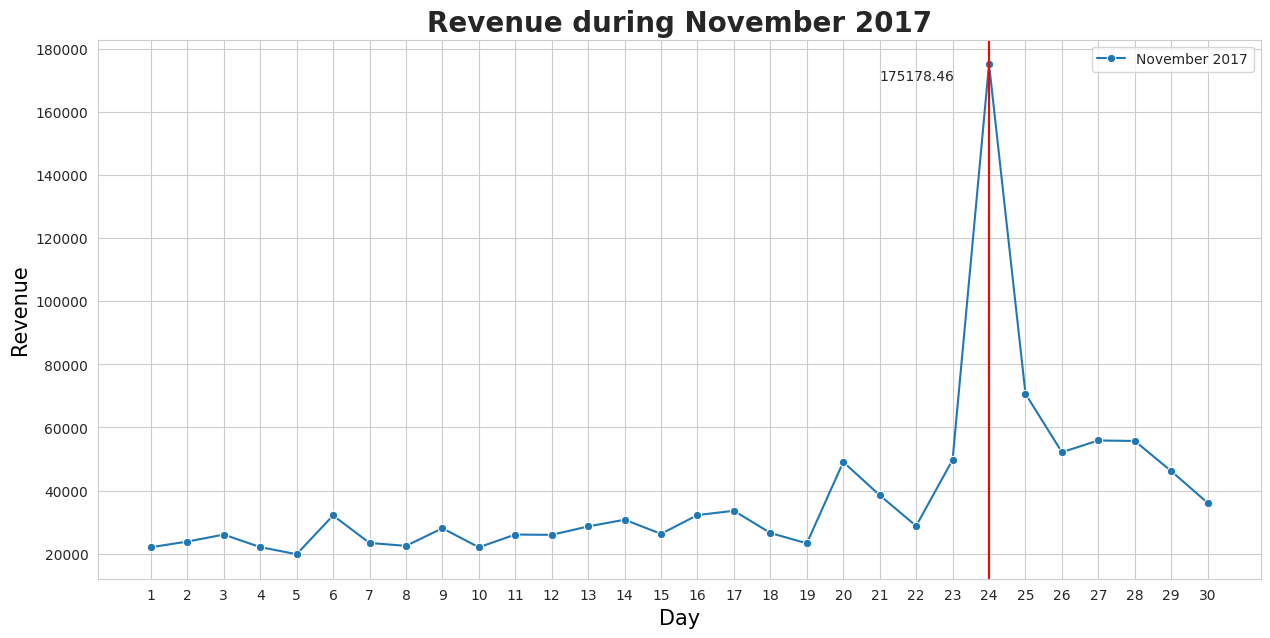

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(y = revenueNovember2017['total_revenue'], x = revenueNovember2017.index, marker = 'o', label = 'November 2017')
plt.title('Revenue during November 2017',fontweight='bold',fontsize=20)
plt.axvline(24, c = 'r')
plt.annotate(revenueNovember2017.loc[24].total_revenue, (21, 170000))
plt.xlabel('Day',fontsize=15,color='black')
plt.ylabel('Revenue',fontsize=15,color='black')
plt.xticks(range(1, 31))
plt.legend()
plt.show()

Observations:

1. Black Friday Sale fell on 24th of November during the year 2017, during which the highest number of orders, 1147 orders were placed.
2. This generated the maximum revenue for a single day, which was around 175K Brazilian Real.
3. During the further sales in later years, this should be tapped in to increase the revenue and compare with other players in the same industry.
4. The peak and trought seen in the revenue during the months of November and December corresponds to Black Friday Sale, and the dip in sales is not necessarily due to any specific reasons. This is said because the December's revenue is still higher than that of November's. So the trought is not due to any wrongdoings in the business.

### Late delivering sellers on Black Friday

In [ ]:
def deliveryType(Date):
    if Date < 0:
        return 'Late'
    else:
        return 'OnTime'

In [ ]:
blackFriday = november2017[november2017.Date == 24]
blackFriday['Delivery'] = blackFriday['delivered_estimated'].apply(deliveryType)
blackFriday.head()


<ipython-input-314-b6156ee19ccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blackFriday['Delivery'] = blackFriday['delivered_estimated'].apply(deliveryType)


order_id                       customer_id  \
17   6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
59   b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
60   b01875821b8dcb6abc61776f0f971bce  818596f5b68adfe2c11498ebb6d39e02   
115  c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   
116  c263211bd219538f7c031591e87ef0d7  ed8c52327eecff596e141636d5b556d2   

    order_status order_purchase_timestamp   order_approved_at  \
17     delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
59     delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
60     delivered      2017-11-24 21:55:22 2017-11-25 01:31:43   
115    delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   
116    delivered      2017-11-24 16:56:46 2017-11-28 03:48:24   

    order_delivered_carrier_date order_delivered_customer_date  \
17           2017-12-13 21:14:05           2017-12-28 18:59:23   
59           2017-11-28 22:37:15           2017-12-01 21:11:40   
60           2017-11-28 22:37:15           2017-12-01 21:11:40   
115          2017-12-08 23:28:26           2017-12-18 20:24:54   
116          2017-12-08 23:28:26           2017-12-18 20:24:54   

    order_estimated_delivery_date  purchased_approved  approved_carrier  ...  \
17                     2017-12-21               10401                18  ...   
59                     2017-12-15               12981                 3  ...   
60                     2017-12-15               12981                 3  ...   
115                    2017-12-19               39098                10  ...   
116                    2017-12-19               39098                10  ...   

                           product_id                         seller_id  \
17   be021417a6acb56b9b50d3fd2714baa8  f5f46307a4d15880ca14fab4ad9dfc9b   
59   a6ad77b15e566298a4e8ee2011ab1255  1025f0e2d44d7041d6cf58b6550e0bfa   
60   a6ad77b15e566298a4e8ee2011ab1255  1025f0e2d44d7041d6cf58b6550e0bfa   
115  028b0b0277744a9eaa2c4f57c24dcb68  1025f0e2d44d7041d6cf58b6550e0bfa   
116  028b0b0277744a9eaa2c4f57c24dcb68  1025f0e2d44d7041d6cf58b6550e0bfa   

     shipping_limit_date  price freight_value Month isLateDelivery  \
17   2017-11-30 00:21:09  339.0         17.12    11              1   
59   2017-12-01 00:38:17   31.8         39.28    11              0   
60   2017-12-01 00:38:17   31.8         39.28    11              0   
115  2017-12-05 03:48:24  359.7         17.27    11              0   
116  2017-12-05 03:48:24  359.7         17.27    11              0   

     isOnTimeDelivery  Date  Delivery  
17                  0    24      Late  
59                  1    24    OnTime  
60                  1    24    OnTime  
115                 0    24    OnTime  
116                 0    24    OnTime  

[5 rows x 24 columns]

In [ ]:
blackFriday.order_id.nunique()

1147

In [ ]:
year2017.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
2  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
3  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
4  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
2    delivered      2017-07-09 21:57:05 2017-07-09 22:10:13   
3    delivered      2017-05-16 13:10:30 2017-05-16 13:22:11   
4    delivered      2017-01-23 18:29:09 2017-01-25 02:50:47   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-11-22 13:39:59           2017-12-02 00:28:42   
2          2017-07-11 14:58:04           2017-07-26 10:57:55   
3          2017-05-22 10:07:46           2017-05-26 12:55:51   
4          2017-01-26 14:16:31           2017-02-02 14:08:10   

  order_estimated_delivery_date  purchased_approved  approved_carrier  ...  \
0                    2017-10-18                 642                 2  ...   
1                    2017-12-15                1073                 3  ...   
2                    2017-08-01                 788                 1  ...   
3                    2017-06-07                 701                 5  ...   
4                    2017-03-06               30098                 1  ...   

   purchased_delivered  order_item_id                        product_id  \
0                    8              1  87285b34884572647811a353c7ac498a   
1                   13              1  d0b61bfb1de832b15ba9d266ca96e5b0   
2                   16              1  060cb19345d90064d1015407193c233d   
3                    9              1  4520766ec412348b8d4caa5e8a18c464   
4                    9              1  ac1789e492dcd698c5c10b97a671243a   

                          seller_id shipping_limit_date   price freight_value  \
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15   29.99          8.72   
1  66922902710d126a0e7d26b0e3805106 2017-11-23 19:45:59   45.00         27.20   
2  8581055ce74af1daba164fdbd55a40de 2017-07-13 22:10:13  147.90         27.36   
3  16090f2ca825584b5a147ab24aa30c86 2017-05-22 13:22:11   59.99         15.17   
4  63b9ae557efed31d1f7687917d248a8d 2017-01-27 18:29:09   19.90         16.05   

   Month  isLateDelivery  isOnTimeDelivery  
0     10               0                 1  
1     11               0                 1  
2      7               0                 1  
3      5               0                 1  
4      1               0                 1  

[5 rows x 22 columns]

In [ ]:
lateDeliveringSellers_blackFriday = blackFriday[blackFriday.delivered_estimated < 0]['seller_id']
lateDeliveringSellers_blackFriday.value_counts().to_frame()

count
seller_id                              
8160255418d5aaa7dbdc9f4c64ebda44     22
1f50f920176fa81dab994f9023523100     18
1025f0e2d44d7041d6cf58b6550e0bfa     18
4a3ca9315b744ce9f8e9374361493884     12
54965bbe3e4f07ae045b90b0b8541f52     11
...                                 ...
1da3aeb70d7989d1e6d9b0e887f97c23      1
7b07b3c7487f0ea825fc6df75abd658b      1
c864036feaab8c1659f65ea4faebe1da      1
712e6ed8aa4aa1fa65dab41fed5737e4      1
2c9e548be18521d1c43cde1c582c6de8      1

[114 rows x 1 columns]

In [ ]:
print('Number of sellers who delivered late during black friday: ', blackFriday[blackFriday.delivered_estimated < 0]['seller_id'].nunique())

Number of sellers who delivered late during black friday:  114


In [ ]:
averageLateDeliveringSellers = november2017[november2017.delivered_estimated < 0].groupby('Date').agg({'seller_id' : 'nunique'}).drop(24).seller_id.mean()
print('Average late delivering sellers over the months: ', round(averageLateDeliveringSellers))

Average late delivering sellers over the months:  22


In [ ]:
lateDeliveringSellers_blackFriday = blackFriday[blackFriday.delivered_estimated < 0]['seller_id']
lateDeliveringSellers_blackFriday.value_counts()[lateDeliveringSellers_blackFriday.value_counts() > 5]

seller_id
8160255418d5aaa7dbdc9f4c64ebda44    22
1f50f920176fa81dab994f9023523100    18
1025f0e2d44d7041d6cf58b6550e0bfa    18
4a3ca9315b744ce9f8e9374361493884    12
54965bbe3e4f07ae045b90b0b8541f52    11
ea8482cd71df3c1969d7b9473ff13abc    10
Name: count, dtype: int64

Observations:

1. As the number of orders increased, late deliveries was also on the rise which indicates inability to handle huge volume of orders.
2. During peak sales days, such late delivering sellers should be avoided or they should be told to increase their delivery performance.

### Late deliveries on Black Friday Sale

In [ ]:
ontimeDelivery_bf = blackFriday[blackFriday.delivered_estimated > 0][['purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']].mean()
lateDelivery_bf = blackFriday[blackFriday.delivered_estimated < 0][['purchased_approved', 'approved_carrier', 'carrier_delivered', 'delivered_estimated', 'purchased_delivered']].mean()
comparision = pd.DataFrame([ontimeDelivery_bf, lateDelivery_bf]).T
comparision.rename(columns = {0 : 'on time delivery', 1 : 'late delivery'}, inplace = True)
comparision

on time delivery  late delivery
purchased_approved       15799.711174   18235.150000
approved_carrier             3.282197       7.869231
carrier_delivered            8.235795      23.346154
delivered_estimated          9.737689      -9.788462
purchased_delivered         12.554924      32.380769

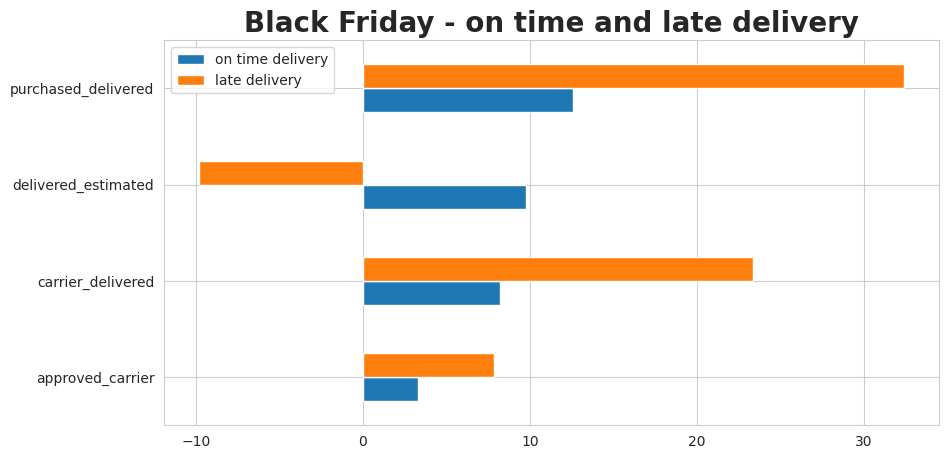

In [ ]:
comparision.drop('purchased_approved').plot(kind = 'barh', figsize = (10, 5))
plt.title('Black Friday - on time and late delivery',fontweight='bold',fontsize=20)
plt.show()

In [ ]:
blackFriday.Delivery.value_counts(normalize = True) * 100

Delivery
OnTime    80.669145
Late      19.330855
Name: proportion, dtype: float64

Observations:

1. Inability to handle huge volume of orders (1147) as 19.33% of orders delivered late compared to an overall 8.12% late deliveries.
2. Increase delivery performance to attract more sales during successive offers.
3. Understand customer preference and market those products extensively on sale days.

### Products ordered on Black Friday Sale

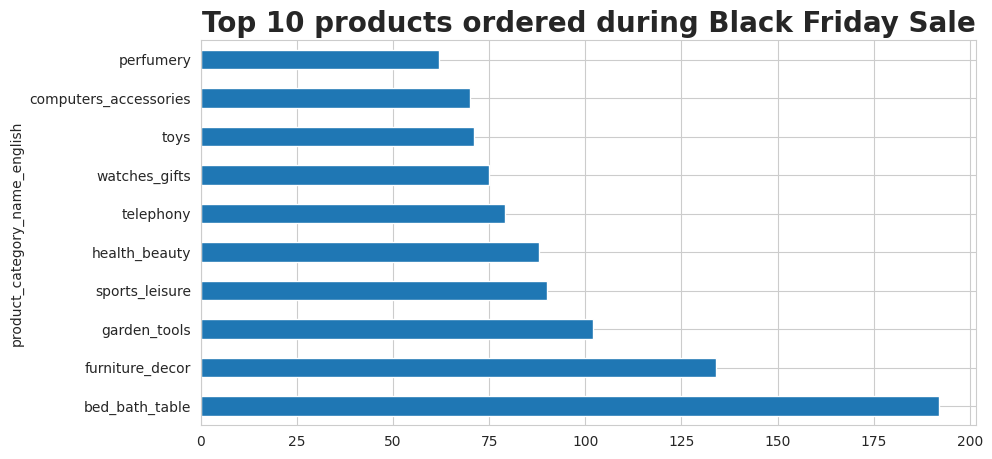

In [ ]:
blackFridayProducts = blackFriday.merge(products[['product_id', 'product_category_name']], on = 'product_id').merge(productCategoryTranslation, on = 'product_category_name')
plt.figure(figsize = (10, 5))
blackFridayProducts.product_category_name_english.value_counts()[:10].plot(kind = 'barh')
plt.title('Top 10 products ordered during Black Friday Sale',fontweight='bold',fontsize=20)
plt.show()

Observations:

1. Customer preferences, regional demands, market trends should be considered during future sale days so as to increase revenue.
2. Customer preferences could be seen from the above bar plot, which gives the top products ordered during the black friday sale.
3. Bed bath table constituted the most orders during that day.

## Analysis of Late Deliveries

In [ ]:
def is_late(Days):
    if Days < -10:
        return 'delayed by >10 days'
    elif Days < -5 and Days >= -10:
        return 'delayed by 6-10 days'
    elif Days < 0 and Days >= -5:
        return 'delayed by 1-5 days'
    else:
        return 'on time'

In [ ]:
lateDelivery = orders[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivered_estimated']].merge(orderReviews[['order_id', 'review_score']], on = 'order_id', how = 'left')
lateDelivery['is_late'] = lateDelivery['delivered_estimated'].apply(is_late)
lateDelivery.head()

order_id order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2  47770eb9100c2d0c44946d9cf07ec65d      2018-08-08 08:38:49   
3  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
4  ad21c59c0840e6cb83a9ceb5573f8159      2018-02-13 21:18:39   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-10-10 21:25:13                    2017-10-18   
1           2018-08-07 15:27:45                    2018-08-13   
2           2018-08-17 18:06:29                    2018-09-04   
3           2017-12-02 00:28:42                    2017-12-15   
4           2018-02-16 18:17:02                    2018-02-26   

   delivered_estimated  review_score  is_late  
0                    7           NaN  on time  
1                    5           4.0  on time  
2                   17           NaN  on time  
3                   12           NaN  on time  
4                    9           NaN  on time

In [ ]:
lateDelivery.is_late.value_counts()

is_late
on time                 87320
delayed by 1-5 days      3596
delayed by >10 days      2294
delayed by 6-10 days     1904
Name: count, dtype: int64

In [ ]:
lateDelivery.is_late.value_counts(normalize = True) * 100

is_late
on time                 91.805623
delayed by 1-5 days      3.780726
delayed by >10 days      2.411843
delayed by 6-10 days     2.001808
Name: proportion, dtype: float64

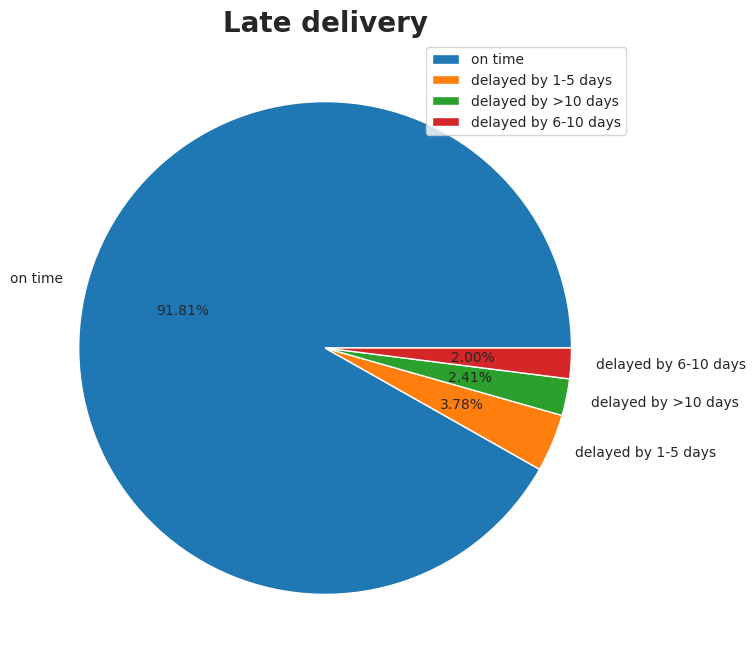

In [ ]:
plt.figure(figsize = (10, 8))
plt.pie(lateDelivery.is_late.value_counts(), autopct = '%0.2f%%', labels = lateDelivery.is_late.value_counts().index)
plt.title('Late delivery',fontweight='bold',fontsize=20)
plt.legend()
plt.show()


Observations:

1. To find out if the order was delivered late than the expected date of delivery, we took the order_delivered_customer_date and the order_estimated_delivery_date and subtracted them to get the required number of days.
2. If the value was in positive, it denotes that the products were delivered before the estimated date of delivery, which are mapped to on time.
3. Late deliveries upto 5 days are mapped to delayed by 1-5 days, while late deliveries between 5-10 days are mapped to delayed by 6-10 days and late deliveries greater than 10 are mapped to delayed by >10 days.
4. Of all the orders, 91.89% of orders were delivered on time, whereas, only 8.11% of deliveries were delivered late. But this level of late deliveries should also be minimized in order to retain more customers, as they could potentially move to other e-commerce platforms.

In [ ]:
reviewScore_lateDelivery = lateDelivery.groupby('is_late').agg({'review_score' : 'mean'})
reviewScore_lateDelivery

review_score
is_late                           
delayed by 1-5 days       3.393782
delayed by 6-10 days      1.824645
delayed by >10 days       1.736559
on time                   4.042449

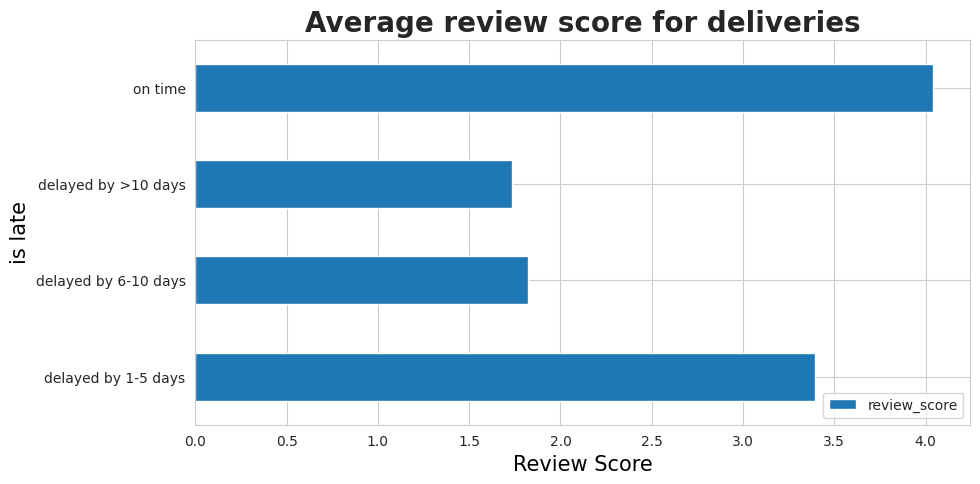

In [ ]:
reviewScore_lateDelivery.plot(kind = 'barh', figsize = (10, 5))
plt.title('Average review score for deliveries',fontweight='bold',fontsize=20)
plt.xlabel('Review Score',fontsize=15,color='black')
plt.ylabel('is late',fontsize=15,color='black')
plt.show()


Observations:

1. The delivery time with respect to the expected date of delivery is correlated with the review score that the customers give.
2. For instance, orders which were delivered on time recieved on an average of 4 as their review score, while orders which were delivered late by more than 10 days recieved an average review score of 1.7.
3. This could be a clear indication that the customers were dissatisfied by the late deliveries, and this needs to be minimized to a greater extent to retain customers.

In [ ]:
lateDeliveringSellers = lateDelivery[lateDelivery.is_late != 'on time'].merge(orderItems[['seller_id', 'product_id', 'order_id', 'product_id']], on = 'order_id', how = 'left')
lateDeliveringSellersAnalysis = lateDeliveringSellers.groupby('seller_id').agg({'order_id' : 'count', 'delivered_estimated' : 'mean'}).sort_values(by = 'order_id', ascending = False)[:11]
lateDeliveringSellersAnalysis['delivered_estimated'] = lateDeliveringSellersAnalysis['delivered_estimated'].round()
lateDeliveringSellersAnalysis

order_id  delivered_estimated
seller_id                                                      
4a3ca9315b744ce9f8e9374361493884       214                -11.0
1f50f920176fa81dab994f9023523100       182                -10.0
4869f7a5dfa277a7dca6462dcf3b52b2       133                 -9.0
1025f0e2d44d7041d6cf58b6550e0bfa       130                 -6.0
7c67e1448b00f6e969d365cea6b010ab       130                -11.0
ea8482cd71df3c1969d7b9473ff13abc       123                 -8.0
6560211a19b47992c3666cc44a7e94c0       122                 -7.0
955fee9216a65b617aa5c0531780ce60       119                 -7.0
da8622b14eb17ae2831f4ac5b9dab84a       113                -11.0
cc419e0650a3c5ba77189a1882b7556a       103                 -8.0
8b321bb669392f5163d04c59e235e066       103                 -9.0

Observations:

1. The list of sellers who were involved in late deliveries of more than 100 orders, and the delivered_estimated field is the average number of days taken for late delivery of such orders.
2. If we could make these sellers deliver on time, we could further avoid customer dissatisfaction, which was reflected in the low review rating.

## Golden hours for business

In [ ]:
def weekend(dayName):
    if dayName == 'Saturday' or dayName == 'Sunday':
        return 'weekend'
    else:
        return 'weekday'

In [ ]:
ordersTimeAnalysis = orders.copy().merge(orderItems, on = 'order_id')
ordersTimeAnalysis['Hour'] = ordersTimeAnalysis.order_purchase_timestamp.dt.hour
ordersTimeAnalysis['day_name'] = ordersTimeAnalysis.order_purchase_timestamp.dt.day_name()
ordersTimeAnalysis['is_weekend'] = ordersTimeAnalysis.day_name.apply(weekend)
ordersTimeAnalysis['total_revenue'] = ordersTimeAnalysis.price + ordersTimeAnalysis.freight_value
ordersTimeAnalysis.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  purchased_approved  approved_carrier  ...  \
0                    2017-10-18                 642                 2  ...   
1                    2018-08-13               24170                 0  ...   
2                    2018-09-04                 994                 0  ...   
3                    2017-12-15                1073                 3  ...   
4                    2018-02-26                3710                 0  ...   

   order_item_id                        product_id  \
0              1  87285b34884572647811a353c7ac498a   
1              1  595fac2a385ac33a80bd5114aec74eb8   
2              1  aa4383b373c6aca5d8797843e5594415   
3              1  d0b61bfb1de832b15ba9d266ca96e5b0   
4              1  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id  shipping_limit_date   price  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  2017-10-06 11:07:15   29.99   
1  289cdb325fb7e7f891c38608bf9e0962  2018-07-30 03:24:27  118.70   
2  4869f7a5dfa277a7dca6462dcf3b52b2  2018-08-13 08:55:23  159.90   
3  66922902710d126a0e7d26b0e3805106  2017-11-23 19:45:59   45.00   
4  2c9e548be18521d1c43cde1c582c6de8  2018-02-19 20:31:37   19.90   

  freight_value Hour   day_name  is_weekend  total_revenue  
0          8.72   10     Monday     weekday          38.71  
1         22.76   20    Tuesday     weekday         141.46  
2         19.22    8  Wednesday     weekday         179.12  
3         27.20   19   Saturday     weekend          72.20  
4          8.72   21    Tuesday     weekday          28.62  

[5 rows x 23 columns]

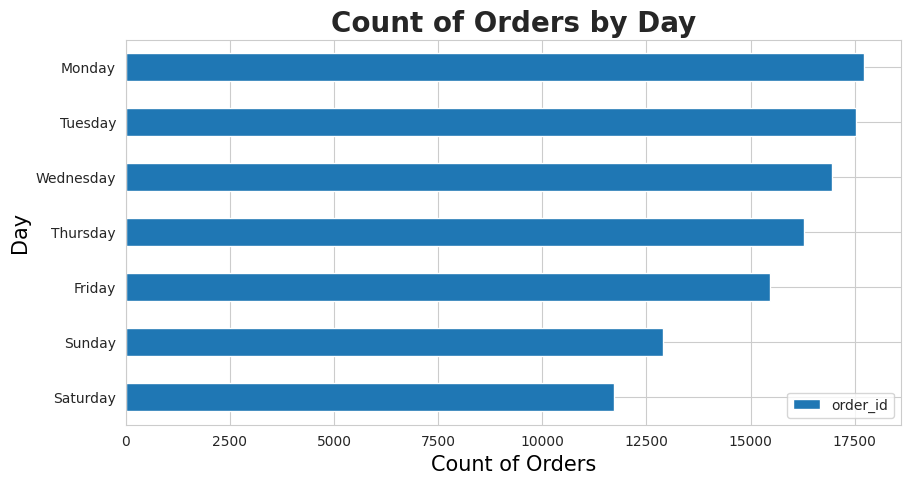

In [ ]:
ordersTimeAnalysis.groupby(['day_name']).agg({'order_id' : 'count'}).sort_values('order_id').plot(kind = 'barh', figsize = (10, 5))
plt.title('Count of Orders by Day',fontweight='bold',fontsize=20)
plt.xlabel('Count of Orders',fontsize=15,color='black')
plt.ylabel('Day',fontsize=15,color='black')
plt.show()

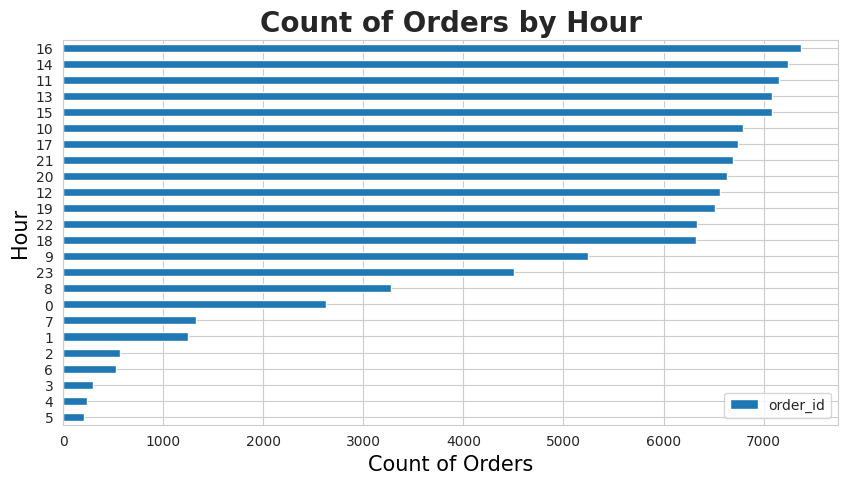

In [ ]:
ordersTimeAnalysis.groupby(['Hour']).agg({'order_id' : 'count'}).sort_values('order_id').plot(kind = 'barh', figsize = (10, 5))
plt.title('Count of Orders by Hour',fontweight='bold',fontsize=20)
plt.xlabel('Count of Orders',fontsize=15,color='black')
plt.ylabel('Hour',fontsize=15,color='black')
plt.show()

Observations:

1. The above plots represent the peak hours and peak days during which the customers order products.
2. The customer traffic is more during the weekdays compared to the weekends, with Monday and Tuesday being the days when most orders were placed.
3. Similarly, the peak time during which most number of orders were placed were between 11 AM to 4 PM in the afternoon.
4. We could improve our sales and revenue if we could tap in this information and target the customers with attractive offers.

Business recommendations:

1. Increase weekend sales by strong digital presence and extensive marketing.
2. Attractive offers during peak hour business.
3. Targeting customers through personalised advertisements of products they prefer.
4. Loyal customers benefits and improve customer support.

##Exploratory Data Analysis On Products dataframe

In [ ]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
print('Number of records:',products.shape[0])
print('Number of Columns:',products.shape[1])

Number of records: 32951
Number of Columns: 9


In [ ]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products.dropna(inplace = True)

Observation:

1. Since the product IDs are masked, if they do not have any category name, we could not interpret anything from the data, so dropping such records will be the best way to proceed with the analysis.

In [ ]:
orderedProducts = products.merge(orderItems, on = 'product_id').merge(productCategoryTranslation, on = 'product_category_name')[['product_id', 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_id', 'price', 'freight_value']]
orderedProducts['total_revenue'] = orderedProducts.price + orderedProducts.freight_value
orderedProducts.head()


product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  3aa071139cb16b67ca9e5dea641aaa2f                           art   
2  96bd76ec8810374ed1b65e291975717f                sports_leisure   
3  cef67bcfe19066a932b7673e239eb23d                          baby   
4  9dc1a7de274444849c219cff195d0b71                    housewares   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

                           order_id   price  freight_value  total_revenue  
0  e17e4f88e31525f7deef66779844ddce   10.91           7.39          18.30  
1  5236307716393b7114b53ee991f36956  248.00          17.99         265.99  
2  01f66e58769f84129811d43eefd187fb   79.80           7.82          87.62  
3  143d00a4f2dde4e0364ee1821577adb3  112.30           9.54         121.84  
4  86cafb8794cb99a9b1b77fc8e48fbbbb   37.90           8.29          46.19

In [ ]:
orderedProductsAnalysis = orderedProducts.groupby('product_category_name_english', as_index = False).agg({
                                                        'product_id'                      : 'count',
                                                        'order_id'                        : 'count',
                                                        'price'                           : 'sum',
                                                        'freight_value'                   : 'sum',
                                                        'total_revenue'                   : 'sum'})
orderedProductsAnalysis.head()

product_category_name_english  product_id  order_id     price  \
0    agro_industry_and_commerce         212       212  72530.47   
1              air_conditioning         297       297  55024.96   
2                           art         209       209  24202.64   
3         arts_and_craftmanship          24        24   1814.01   
4                         audio         364       364  50688.50   

   freight_value  total_revenue  
0        5843.60       78374.07  
1        6749.23       61774.19  
2        4045.17       28247.81  
3         370.13        2184.14  
4        5710.44       56398.94

In [ ]:
orderedProductsAnalysis.select_dtypes(include = np.number).describe()

product_id      order_id         price  freight_value  total_revenue
count     71.000000     71.000000  7.100000e+01      71.000000   7.100000e+01
mean    1563.690141   1563.690141  1.887980e+05   31313.653521   2.201117e+05
std     2606.537422   2606.537422  3.036850e+05   50281.462423   3.515343e+05
min        2.000000      2.000000  2.832900e+02      41.220000   3.245100e+02
25%       93.000000     93.000000  9.171185e+03    1973.205000   1.174393e+04
50%      281.000000    281.000000  4.685688e+04    6749.230000   5.605240e+04
75%     1819.000000   1819.000000  2.029071e+05   35505.620000   2.214684e+05
max    11115.000000  11115.000000  1.258681e+06  204693.040000   1.441248e+06

In [ ]:
top10revenueGenerating = orderedProductsAnalysis.sort_values(by = 'total_revenue', ascending = False)[:10]
top10revenueGenerating

product_category_name_english  product_id  order_id       price  \
43                 health_beauty        9670      9670  1258681.34   
70                 watches_gifts        5991      5991  1205005.68   
7                 bed_bath_table       11115     11115  1036988.68   
65                sports_leisure        8641      8641   988048.97   
15         computers_accessories        7827      7827   911954.32   
39               furniture_decor        8334      8334   729762.49   
49                    housewares        6964      6964   632248.66   
20                    cool_stuff        3796      3796   635290.85   
5                           auto        4235      4235   592720.11   
42                  garden_tools        4347      4347   485256.46   

    freight_value  total_revenue  
43      182566.73     1441248.07  
70      100535.93     1305541.61  
7       204693.04     1241681.72  
65      168607.51     1156656.48  
15      147318.08     1059272.40  
39      172749.30      902511.79  
49      146149.11      778397.77  
20       84039.10      719329.95  
5        92664.21      685384.32  
42       98962.75      584219.21

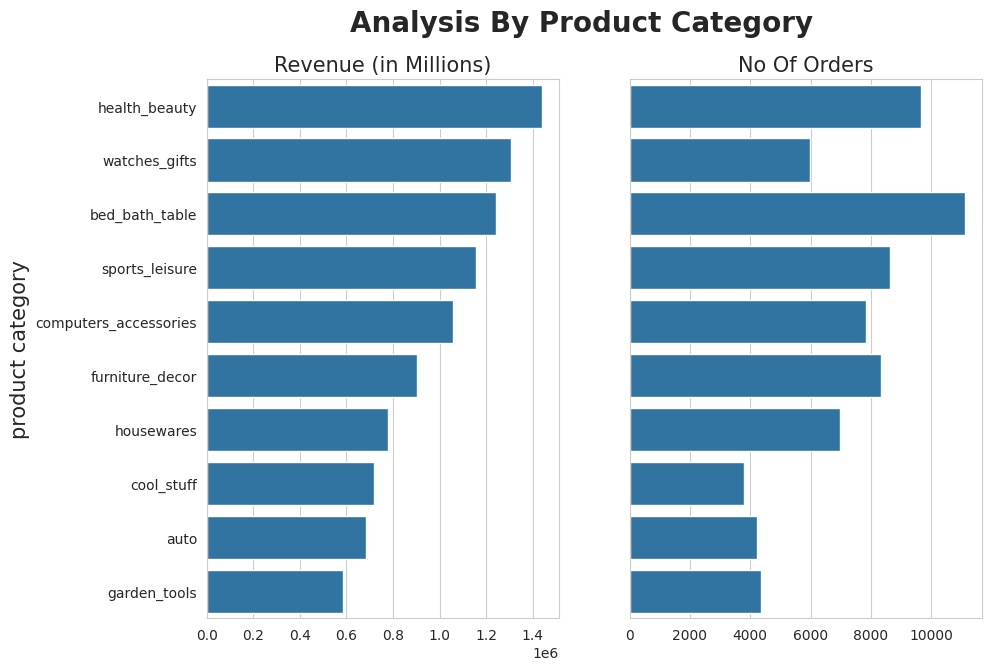

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), sharey=True)
fig.suptitle('Analysis By Product Category', fontsize=20, fontweight = 'bold')

sns.barplot(ax=ax[0], x='total_revenue', y= top10revenueGenerating.product_category_name_english, data = top10revenueGenerating)
ax[0].set_title('Revenue (in Millions)', fontsize = 15)
ax[0].set_ylabel('product category', fontsize = 15)

sns.barplot(ax=ax[1], x='order_id', y = top10revenueGenerating.product_category_name_english, data = top10revenueGenerating)
ax[1].set_title('No Of Orders', fontsize = 15)

for i in range(0,2):
    ax[i].set(xlabel=None)

for i in range(1,2):
    ax[i].set(ylabel=None)

In [ ]:
bottom10revenueGenerating = orderedProductsAnalysis.sort_values(by = 'total_revenue', ascending = True)[:10]
bottom10revenueGenerating

product_category_name_english  product_id  order_id    price  \
61         security_and_services           2         2   283.29   
29     fashion_childrens_clothes           8         8   569.85   
11             cds_dvds_musicals          14        14   730.00   
46                home_comfort_2          30        30   760.27   
35                       flowers          33        33  1110.04   
23           diapers_and_hygiene          39        39  1567.59   
3          arts_and_craftmanship          24        24  1814.01   
52                    la_cuisine          14        14  2054.99   
32                 fashion_sport          30        30  2119.51   
27        fashio_female_clothing          48        48  2803.64   

    freight_value  total_revenue  
61          41.22         324.51  
29          95.51         665.36  
11         224.99         954.99  
46         410.31        1170.58  
35         488.87        1598.91  
23         573.68        2141.27  
3          370.13        2184.14  
52         333.55        2388.54  
32         578.13        2697.64  
27         621.75        3425.39

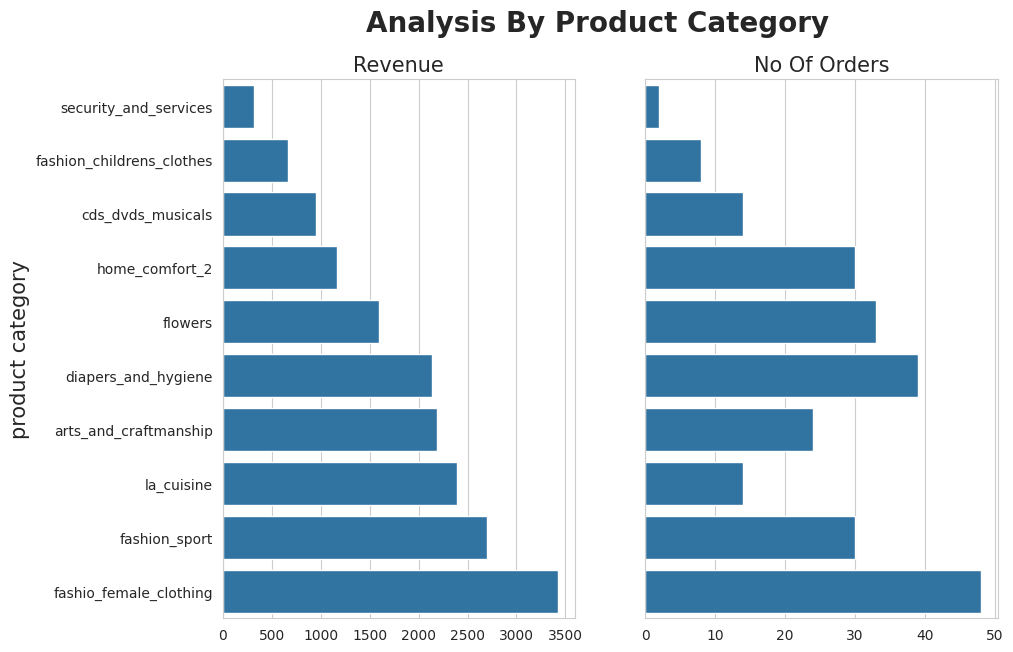

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), sharey=True)
fig.suptitle('Analysis By Product Category', fontsize=20, fontweight = 'bold')

sns.barplot(ax=ax[0], x='total_revenue', y= bottom10revenueGenerating.product_category_name_english, data = bottom10revenueGenerating)
ax[0].set_title('Revenue', fontsize = 15)
ax[0].set_ylabel('product category', fontsize = 15)

sns.barplot(ax=ax[1], x='order_id', y = bottom10revenueGenerating.product_category_name_english, data = bottom10revenueGenerating)
ax[1].set_title('No Of Orders', fontsize = 15)

for i in range(0,2):
    ax[i].set(xlabel=None)

for i in range(1,2):
    ax[i].set(ylabel=None)

Observations:

1. The main inference from the analysis of products ordered is, the total revenue each product category generated.
2. The minimum revenue generated products were, security and services, fashion childrens clothes and cds dvds musicals.
3. While the maximum revenue generated products were health beauty, watches gifts and bed bath table.
4. Security and services is the least ordered product, while bed bath table is the most ordered product.

## Overseas Customers

In [ ]:
overseasCustomers = customerDensity[customerDensity.geolocation_lat > 10]
overseasCustomers.head()

customer_unique_id  customer_zip_code_prefix  \
3830   3fbfe90197db709a78d7e0eaabe0aac0                     47310   
4887   a8563d0be40211e2527f8b80c24f4845                     28595   
5111   aef278d3c4350b0d32907d429421f071                     68447   
14955  c037aa753c0787f6e28b2d5c5e40d997                     68447   
16444  f570b38fd1007c094f293aadb09bcedf                     68447   

       geolocation_lat  geolocation_lng  
3830         38.268205        -7.803886  
4887         43.684961        -7.411080  
5111         42.428884        -6.873344  
14955        42.428884        -6.873344  
16444        42.428884        -6.873344

In [ ]:
# create a map centered on your coordinates
m = folium.Map(location = overseasCustomers[['geolocation_lat', 'geolocation_lng']].values.tolist()[0], zoom_start = 13)

# create a list of coordinates
coordinates = overseasCustomers[['geolocation_lat', 'geolocation_lng']].values.tolist()

# create a heatmap layer with the list of coordinates
heat_layer = HeatMap(coordinates)

# add the heatmap layer to the map
heat_layer.add_to(m)

# display the map
m

In [ ]:
overseasAnalysis = overseasCustomers[['customer_unique_id']].merge(customers, on = 'customer_unique_id').merge(orders, on = 'customer_id').merge(orderItems, on = 'order_id').merge(products, on = 'product_id').merge(productCategoryTranslation, on = 'product_category_name')
overseasAnalysis.head()

customer_unique_id                       customer_id  \
0  3fbfe90197db709a78d7e0eaabe0aac0  d92a2fbf56a1e0f231a58f7a1e9ca540   
1  a8563d0be40211e2527f8b80c24f4845  4457d60c844b9cec4abec3a9507f23a5   
2  aef278d3c4350b0d32907d429421f071  d90af5c00814430fc3e212e8163bf2b8   
3  c037aa753c0787f6e28b2d5c5e40d997  fb5c13a43eab0c123ae49f226709b74a   
4  f570b38fd1007c094f293aadb09bcedf  93a8571aba21529cf631be8c49e279df   

   customer_zip_code_prefix       customer_city customer_state  \
0                     47310  santana do sobrado             BA   
1                     28595             portela             RJ   
2                     68447    vila dos cabanos             PA   
3                     68447    vila dos cabanos             PA   
4                     68447    vila dos cabanos             PA   

                           order_id order_status order_purchase_timestamp  \
0  ed7774b614a7ad220649f09dc6a4c043    delivered      2017-11-16 23:27:21   
1  a85ce89cbcc514dfe135de0036be45db    delivered      2017-08-21 16:17:56   
2  72fb560d115ecf3b15de9b853c02e505    delivered      2018-04-19 14:04:23   
3  1b4f6e77a7bfc8aaecb66219bac6b9eb    delivered      2018-07-16 22:59:19   
4  89b158fc23656141a5e33e93954d025b    delivered      2018-03-24 16:38:22   

    order_approved_at order_delivered_carrier_date  ... freight_value  \
0 2017-11-16 23:50:57          2017-11-17 22:32:25  ...         17.92   
1 2017-08-23 02:50:25          2017-08-23 15:33:02  ...         16.36   
2 2018-04-19 14:34:54          2018-04-23 09:57:00  ...         18.33   
3 2018-07-17 21:35:15          2018-07-20 14:43:00  ...         42.98   
4 2018-03-24 16:50:28          2018-03-27 20:07:47  ...         38.04   

  product_category_name  product_name_lenght  product_description_lenght  \
0      malas_acessorios                 45.0                       217.0   
1    relogios_presentes                 42.0                       236.0   
2          beleza_saude                 50.0                      1257.0   
3                 artes                 48.0                      1232.0   
4      eletrodomesticos                 60.0                       139.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 1.0             850.0               45.0               10.0   
1                 1.0             342.0               18.0               13.0   
2                 1.0             350.0               19.0               12.0   
3                 1.0            1700.0               65.0                6.0   
4                 1.0             300.0               27.0               13.0   

  product_width_cm product_category_name_english  
0             31.0           luggage_accessories  
1             15.0                 watches_gifts  
2             13.0                 health_beauty  
3             50.0                           art  
4             17.0               home_appliances  

[5 rows x 32 columns]

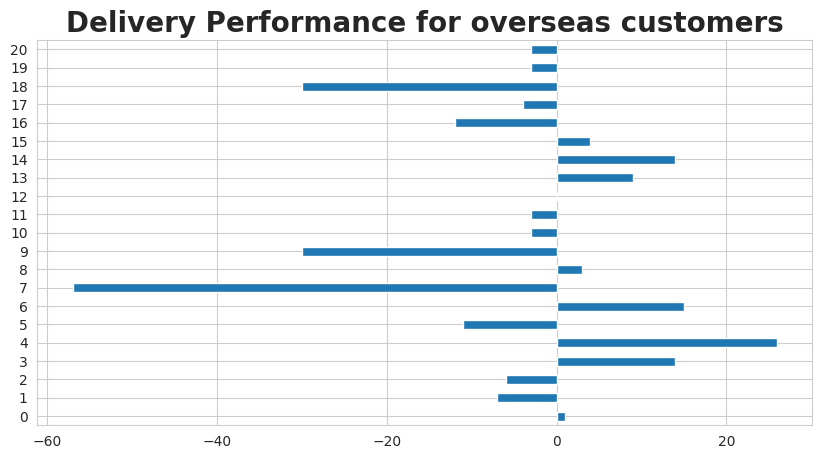

In [ ]:
overseasAnalysis.delivered_estimated.plot(kind = 'barh', figsize = (10, 5))
plt.title('Delivery Performance for overseas customers', fontsize=20, fontweight = 'bold')
plt.show()

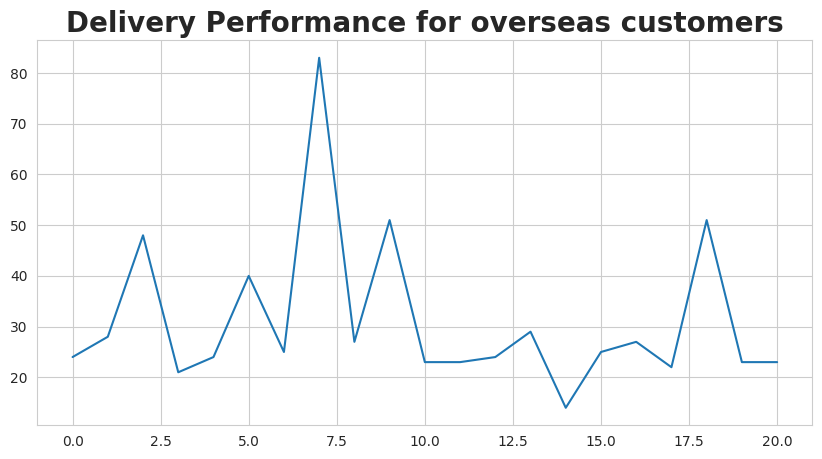

In [ ]:
overseasAnalysis.purchased_delivered.plot(kind = 'line', figsize = (10, 5))
plt.title('Delivery Performance for overseas customers', fontsize=20, fontweight = 'bold')
plt.show()

In [ ]:
overseasAnalysis.product_category_name_english.value_counts()

product_category_name_english
stationery             6
health_beauty          3
watches_gifts          2
auto                   2
luggage_accessories    1
art                    1
home_appliances        1
furniture_decor        1
bed_bath_table         1
cool_stuff             1
telephony              1
home_appliances_2      1
Name: count, dtype: int64

Business Recommendations:

1. Overseas customers mostly ordered from 2018.
2. More than 50% of orders were delivered late than the estimated delivery date.
3. Very poor shipment delivery rate should be handled by opting for a new logistic partner.
4. Promoting indigenous products especially among overseas customers to increase sales and revenue.
5. Focus on company branding and prominency in the origin region, to help create trust among customers.
6. Focus on CX (Customer Experience) throughout the process of order and offer customer support.

# Churn - EDA

## Feature Correlation

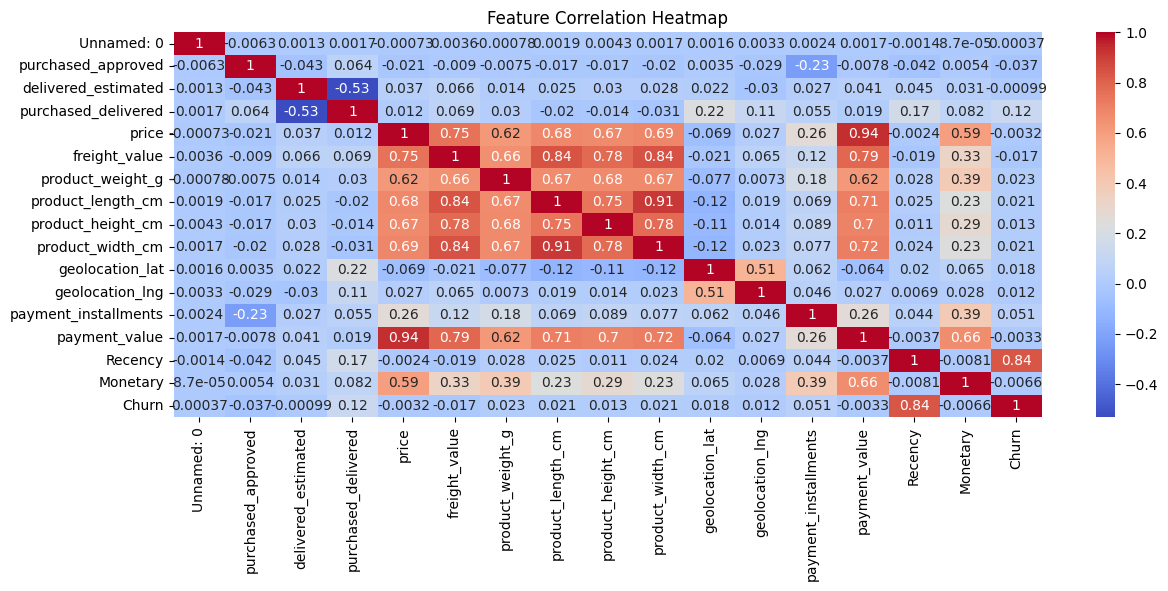

In [ ]:
plt.figure(figsize=(14,5))
sns.heatmap(olist_analysis.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**The insight from the heatmap.**


Positive correlation:
1. price and payment_value (~0.94): This makes sense because higher price products result in higher payment values
2. freight_value and price (~0.75): More expensive products likely have higher shipping costs
3. product_length_cm, product_gheight_cm, product_width_cm (~0.78 - 0.91 among each other): Indicates that products dimensions are closely related
4. Monetary and payment_value (~0.66): Customers who spend more on payments generally have higher monetary value

Negative correlation:
1. delivered_estimated and purchased_delivered (~-0.53): The estimated delivery time is inversely related to the actual time taken, which could mean that the estimated deliveru dates are not always accurate
2. payment_installments and purchased_approved (~-0.23): More installment payments could indicate delayed approval processes

Churn analysis:
1. Monetary and Churn (~-0.0066, weak correlation): There is almost no direct correlation between monetary value and churn, meaning that spending more money doesn't necessarily indicate lower churn
2. Recency and Churn (~0.84): Strong correlation, meaning customers who have not purchased in a long time are more likely to churn




## Churn Distribution

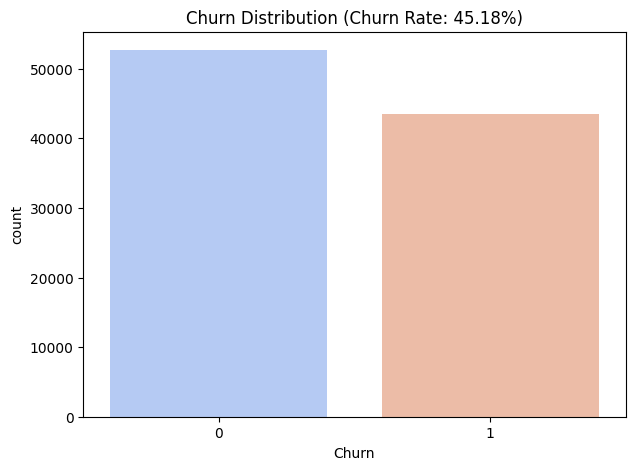

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Churn', data=olist_analysis, hue='Churn', palette='coolwarm', legend=False)
plt.title(f'Churn Distribution (Churn Rate: {olist_analysis["Churn"].mean()*100:.2f}%)')
plt.show()

In [ ]:
churn_rate = olist_analysis['Churn'].mean()*100
print(f"The churn rate is {churn_rate:.2f}%, highlighting retention concerns")

The churn rate is 45.18%, highlighting retention concerns


The key insight over here is showing that the churn rate is 45.18%, meaning almost half of the customers stop purchasing. It matters because churn rate signals potential issues with customer satisfaction. The goal over here: reduce churn, boost retention and maximize long-term revenue

## Payment Type Distribution

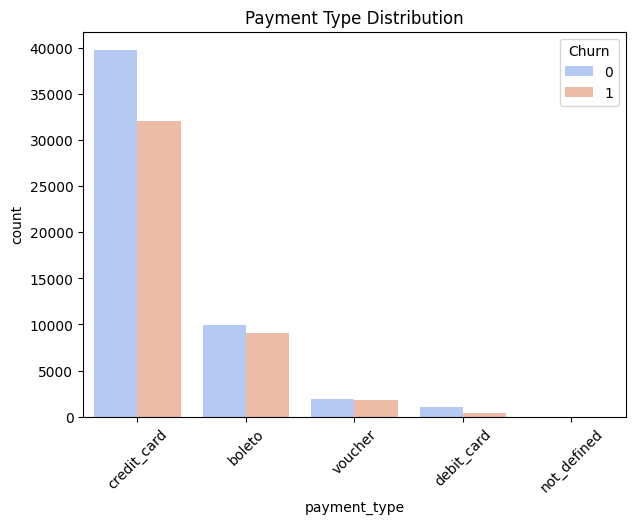

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='payment_type', data=olist_analysis, order=olist_analysis['payment_type'].value_counts().index, hue='Churn', palette='coolwarm')
plt.title('Payment Type Distribution')
plt.xticks(rotation=45)
plt.show()

From the result above, credit card is the most used payment method by the customers but churn the most, possibly due to recurring charges, dissatisfaction, or financial constraints. Followed by boleto (bank slip) users also churn significantly, which could indicate a preference for one-time payments and less loyalty. So, the proportion of churned customers is significant across all payment types, especially credit card and boleto. Vouchers and debit cards have the lowest usage, it may suggest limited adoption or availability

## Payment behavior analysis

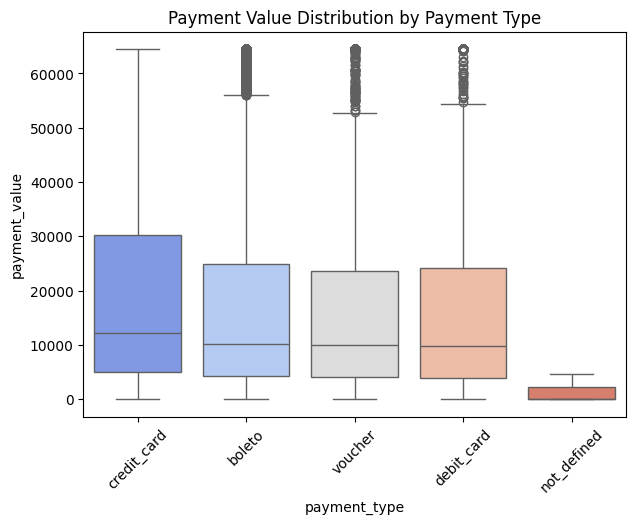

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='payment_type', y='payment_value', data=olist_analysis, hue='payment_type', palette='coolwarm', legend=False)
plt.title('Payment Value Distribution by Payment Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
avg_payment_value = olist_analysis['payment_value'].mean()
print(f"The average payment value is {avg_payment_value:.2f}, which provides insight into customer spending behavior")

The average payment value is 20142.56, which provides insight into customer spending behavior


Credit cards show the widest range of payment values, including high-value purchases. Customers who pay with credit cards tend to spend more, suggesting a preference for convenience and higher purchasing power. Boleto and vouchers have similar distributions, with some high-value transactions, but their spending varies widely. For debit card also have the similar distributions as boleto and vouchers, but with a slightlu lower upper range. Not defined payments have significantly lower values, indicating they might be small transactions or testing cases

## Customer Segmentation (RFM Analysis)

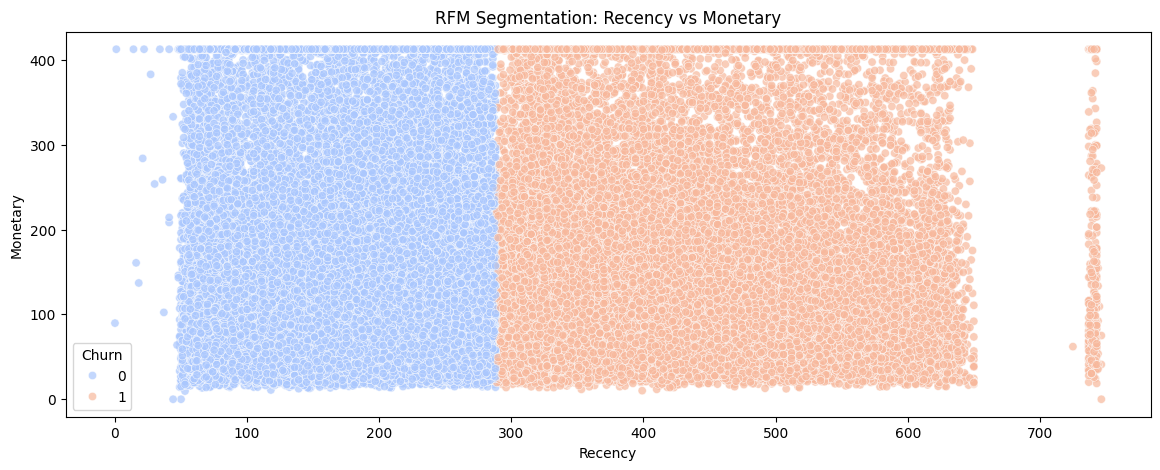

In [ ]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='Recency', y='Monetary', data=olist_analysis, hue='Churn', palette='coolwarm', alpha=0.7)
plt.title('RFM Segmentation: Recency vs Monetary')
plt.show()

In [ ]:
avg_recency = olist_analysis['Recency'].mean()
avg_monetary = olist_analysis['Monetary'].mean()

print(f"The average recency is {avg_recency:.2f} days, useful for customer engagement analysis")
print(f"The average monetary value is {avg_monetary:.2f}, giving insight into overall customer value")

The average recency is 288.11 days, useful for customer engagement analysis
The average monetary value is 153.55, giving insight into overall customer value


The result above shows that churned customers (orange) tend to have higher recency values (right side), meaning they haven't purchased in a long time. Recency is a strong churn indicator, customers who haven't bought recently are far more likely to churn. Active customers (blue) are concentrated on the left side (low recency values), indicating recent purchases, spending amount alone doesn't determine churn, as both high and low spenders exist in both groups. Monetary value (y-axis) is spread across both groups, meaning spending habits alone do not strongly predict churn, suggesting the potential for reactivation

## Customer Purchase frequency analysis

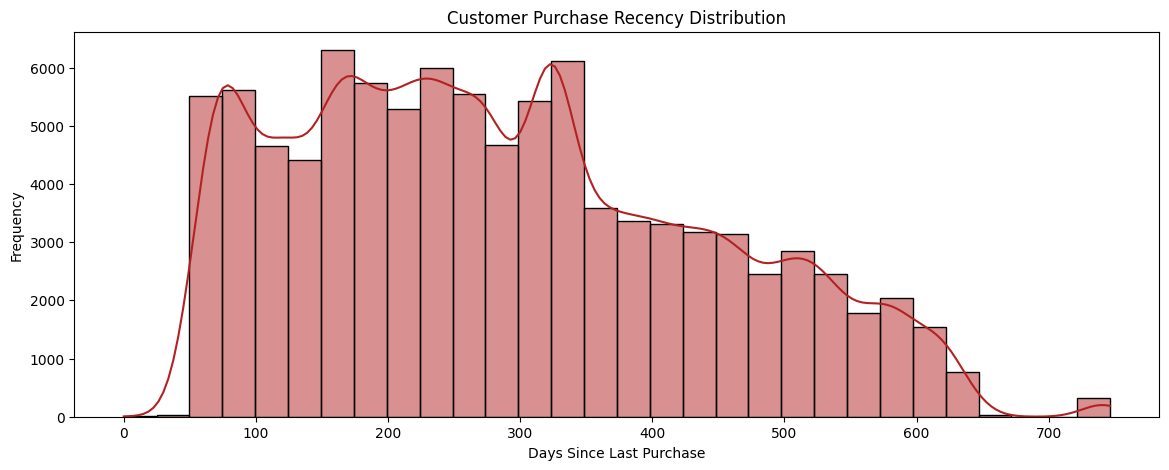

In [ ]:
plt.figure(figsize=(14,5))
sns.histplot(olist_analysis['Recency'], bins=30, kde=True, color='firebrick')
plt.title('Customer Purchase Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()

The x-axis represents the number of days since a customer's last purchase, while the y-axis shows the frequency of customers in each recency range, this means a large portion of customers still engages frequently, but many are at risk of becoming inactive. A significant concentration of customers has made a purchase within the last 100-200 days, indicating a healthy base of recent buyers, the declining trend after 300+ days suggests that customers who haven't purchased in a while are unlikely to return without intervention. There are multiple peaks, which may indicate different customer segments with varying purchase behaviors, the long tail of infrequent buyers signals the need for re-rengagement strategies to bring them back

## Average purchase value by state

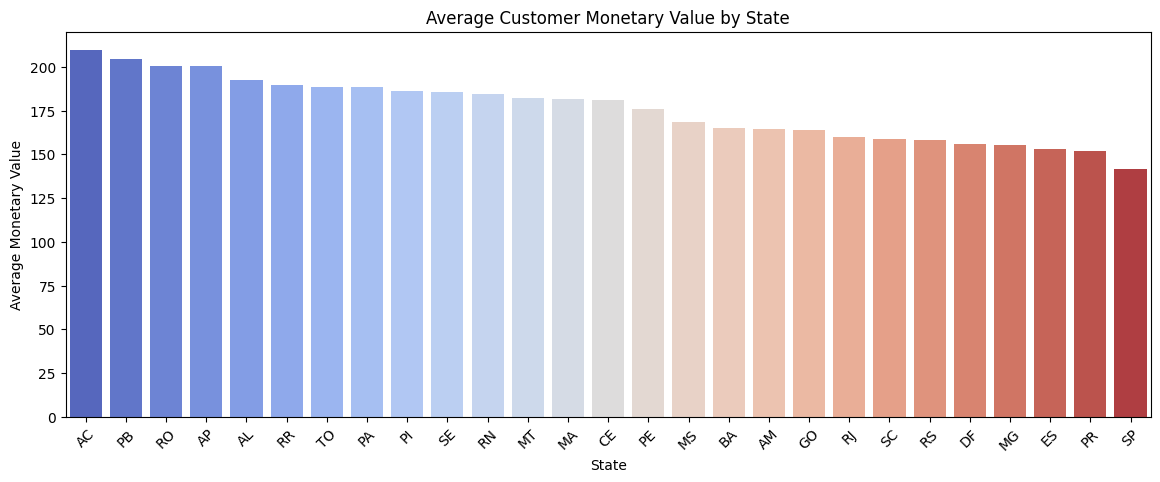

In [ ]:
avg_purchase_by_state = olist_analysis.groupby('customer_state')['Monetary'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,5))
sns.barplot(x=avg_purchase_by_state.index, y=avg_purchase_by_state.values, hue=avg_purchase_by_state.index, palette='coolwarm', legend=False)
plt.title('Average Customer Monetary Value by State')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Average Monetary Value')
plt.show()

The highest average customer monetary value is in Acre (AC), Paraíba (PB), and Rondônia (RO), meaning customers in these states tend to spend more per transaction, this may be ideal targets for premium product offerings or upselling strategies. The lowest average values are seen in São Paulo (SP), Paraná(PR), and Espírito Santo (ES), indicating that the customers in these states spend less per purchase, they might need price sensitive promotions or volume based discounts to encourage higher spending. There is a gradual decline in spending from left to right, suggesting that location may play a role in purchasing behavior, possible factors influencing this distribution include income levels, product availability, and regional economic conditions.